In [174]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/patient/dataset.csv


In [175]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv("/kaggle/input/patient/dataset.csv")
df = df_.copy()

In [176]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

# Veriye İlk Bakış

## Bu bölümde, kullandığımız veri setine ilk bakış yapacağız.Ve verinin bazı temel özelliklerini inceleyeceğiz.

Veri analizi projemize başlamadan önce, kullanılan veri seti hakkında kısa bir bilgilendirme yapmak faydalı olacaktır. Bu veri seti, hastaneye yatırılan hastaların hastanede yaşamını yitirme durumlarını incelemek amacıyla toplanmıştır. Amacımız, bu veri setindeki özellikler üzerinden çeşitli analizler yaparak, hastane içi ölüm oranını etkileyebilecek faktörleri ortaya çıkarmaktır.

Veri setinin ilk 10 gözlemini görelim. Bunun için "df.head(n)" methodunu kullacağız.

In [177]:
# ilk 10 satır
df.head(n=10)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154.0,25312.0,118.0,68.0,22.73,0.0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,Cardiovascular,NaN,0.0
1,114252.0,NaN,81.0,77.0,27.42,0.0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0.0
2,119783.0,50777.0,NaN,25.0,31.95,0.0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0.0
3,79267.0,46918.0,118.0,81.0,22.64,1.0,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,NaN
4,92056.0,34377.0,33.0,19.0,NaN,0.0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0.0
5,33181.0,74489.0,83.0,67.0,27.56,0.0,Caucasian,M,190.5,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,NaN,0.0
6,NaN,49526.0,83.0,NaN,57.45,0.0,NaN,F,165.1,Accident & Emergency,...,NaN,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0.0
7,120995.0,50129.0,33.0,70.0,NaN,0.0,Caucasian,M,165.0,Accident & Emergency,...,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,NaN
8,80471.0,10577.0,118.0,45.0,NaN,0.0,Caucasian,M,170.2,Other Hospital,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,1.0
9,42871.0,NaN,118.0,50.0,25.71,0.0,NaN,M,175.3,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0.0


Toplam satır ve sütun sayısını görmek için .shape kullanalım

In [178]:
# çıktı formatı --> (toplam satır sayısı, toplam sütun sayısı)
df.shape

(91713, 85)

Görüldüğü üzere 91713 kayıt ve 85 değişken var şimdi ise bu 85 değişkenin isimlerini görmek için bir for döngüsü yazarak değişkenleri inceleyelim

Kullandığımız attribute ve fonksiyonların döndürdüğü veri tiplerini gözlemlemek, kod üzerinde hakimiyet kurmak için önemlidir.

In [179]:
#Index nesnesinin, özellikle veri setlerinin satır ve sütun etiketleri ile yapılan işlemlerde verimli ve esnek kullanım özellikleri vardır.
#Bu veri tipi, Pandas veri yapılarında işlemleri hızlandırmak ve veri yönetimini daha güçlü hale getirmek için optimize edilmiştir.
#Özetle, <class 'pandas.core.indexes.base.Index'> ifadesi, Pandas DataFrame veya Series üzerinde yapılan işlemlerin genellikle Index tipi ile çalıştığını gösterir.

print(f"df.columns'ın döndürdüğü veri tipi: {type(df.columns)}\n")

df.columns'ın döndürdüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



info() metodunu kullanarak, veri setine ait yapısal bilgilere, örneğin toplam satır sayısı, sütunlar, her sütunun veri tipi ve eksik verilerin durumu gibi önemli bilgilere ulaşabiliriz. Bu, veri setinin genel durumu hakkında hızlıca bilgi edinmemizi sağlar.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   88952 non-null  float64
 1   patient_id                     89015 non-null  float64
 2   hospital_id                    89075 non-null  float64
 3   age                            84851 non-null  float64
 4   bmi                            85694 non-null  float64
 5   elective_surgery               89081 non-null  float64
 6   ethnicity                      87677 non-null  object 
 7   gender                         88921 non-null  object 
 8   height                         87717 non-null  float64
 9   icu_admit_source               88878 non-null  object 
 10  icu_id                         89044 non-null  float64
 11  icu_stay_type                  89059 non-null  object 
 12  icu_type                       88996 non-null 

Veri Tipleri (dtypes)

Veri setindeki her sütunun veri tipi, yapılan analizlerin doğruluğu ve veri işlemenin etkinliği açısından önemlidir. Pandas'ta sütunların veri tipi, `dtype` olarak belirtilir. Yaygın veri tipleri şunlardır:

- **float64**: Sayısal veriler için kullanılır. Örneğin, yaş, ağırlık, sıcaklık gibi sürekli değişkenler.
- **int64**: Tam sayılar için kullanılır. Örneğin, hastaların numaraları, gün sayıları.
- **object**: Metin veya kategorik veriler için kullanılır. Örneğin, cinsiyet, etnik köken gibi kategorik sütunlar.
- **datetime64**: Tarih ve zaman verileri için kullanılır.

Veri tiplerinin doğru belirlenmesi, veri analizi sürecinde doğru hesaplamaların yapılmasını sağlar.

In [181]:
# df.dtypes 85 sütunun tamamını göstermeyecektir
# Daha okunabilir bir formatta görmek için reset index ile yazdıracağız

df.dtypes.to_frame().reset_index()

,index,0
0,encounter_id,float64
1,patient_id,float64
2,hospital_id,float64
3,age,float64
4,bmi,float64
5,elective_surgery,float64
6,ethnicity,object
7,gender,object
8,height,float64
9,icu_admit_source,object


Görüldğü üzere tüm sütunları göremiyoruz bunu düzeltmek için Pandas'ın görünürlük ayarlarını değiştirmeliyiz

In [182]:
pd.set_option('display.max_rows', None)  # Tüm satırları gösterir

print(df.dtypes)

encounter_id                     float64
patient_id                       float64
hospital_id                      float64
age                              float64
bmi                              float64
elective_surgery                 float64
ethnicity                         object
gender                            object
height                           float64
icu_admit_source                  object
icu_id                           float64
icu_stay_type                     object
icu_type                          object
pre_icu_los_days                 float64
weight                           float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative            float64
arf_apache                       float64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                float64
gcs_verbal_apache                float64
heart_rate_apache                float64
intubated_apache

Veri Setinde Kategorik ve Sayısal Özellikleri Ayırma
Veri setindeki sütunlar, kategorik (örneğin, "job_title", "job_category") ve sayısal (örneğin, "salary", "work_year") özelliklere ayrılabilir. Bu ayrımı yapmak için:

* Kategorik özellikler, genellikle object türündedir (yani metin veri).
* Sayısal özellikler, genellikle float64 veya int64 türündedir.

Veri setinin ham hali, her kolonun doğru veri tipiyle tanımlanmadığı durumlarla karşılaşabiliriz. Özellikle kategorik ve sayısal sütunları ayırırken, her bir sütunun doğru veri tipine sahip olup olmadığını kontrol etmek önemlidir. Bu, verilerin doğru şekilde işlenebilmesi için temel bir adımdır.

Öncelikle, her bir sütunun veri tipini gözden geçirmek gerekmektedir. Bu aşamada, her bir sütunun türünü kontrol etmenin yanı sıra, örnek bir değerini de çekip görüntüleyerek veri tipinin doğru olup olmadığını daha iyi anlayabiliriz. Bu işlem, herhangi bir hata ya da tutarsızlık olup olmadığını belirlememize yardımcı olur.

Bunun için aşağıdaki gibi bir yaklaşım kullanabiliriz:

1. **Veri Tiplerini Gözden Geçirme**: Her sütunun veri tipini kontrol ederek, kategorik ve sayısal verilerin doğru şekilde sınıflandırıldığından emin oluruz.
2. **Örnek Değerler Görüntüleme**: Her bir sütunun veri tipine göre örnek bir değer çekip görüntüleyerek, veri türlerinin doğru olup olmadığını daha net bir şekilde kontrol edebiliriz.

Örneğin, kategorik bir sütun için metin veri ve sayısal bir sütun için bir sayı örneği görüntülemek, hangi türde işlem yapacağımızı anlamamıza yardımcı olur.

In [183]:
# Her sütun için örnek bir değer almak ve veri tipini göstermek için bir liste oluşturuyoruz
column_info = []

for col in df.columns:
    # Sütunun veri tipi "object" veya "category" ise işlemi yapalım
    if df[col].dtype in ['object', 'category']:
        # Sütun adı
        column_name = col
        # Sütunun veri tipi
        dtype = df[col].dtype
        # Sütundan boş olmayan ilk değeri almak
        non_null_value = df[col].dropna().iloc[0] if df[col].dropna().shape[0] > 0 else None  # Eğer boş olmayan değer varsa al
        # Bu bilgileri listeye ekliyoruz
        column_info.append([column_name, dtype, non_null_value])

# DataFrame olarak bu bilgileri tabloya döküyoruz
column_info_df = pd.DataFrame(column_info, columns=["Column Name", "Data Type", "Example Non-Null Value"])

print(column_info_df)

            Column Name Data Type Example Non-Null Value
0             ethnicity    object              Caucasian
1                gender    object                      M
2      icu_admit_source    object                  Floor
3         icu_stay_type    object                  admit
4              icu_type    object                  CTICU
5  apache_3j_bodysystem    object            Respiratory
6   apache_2_bodysystem    object         Cardiovascular


Görüleceği üzere object olan sütunların değerleri metinsel ifadelerden oluşuyor yani veri içindeki sütunlar doğru sınıflandırılmış

In [184]:
categorical_features = []
numerical_features = []

# her bir sütüun için metinsel veriler categorical_features listesine eklenirken  
# sayısal tipteki sütunlar ise numerical_features listesine eklenir

for i in df.columns:
    if df[i].dtype == "object" or df[i].dtype == "category":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

categorical_features,numerical_features

(['ethnicity',
  'gender',
  'icu_admit_source',
  'icu_stay_type',
  'icu_type',
  'apache_3j_bodysystem',
  'apache_2_bodysystem'],
 ['encounter_id',
  'patient_id',
  'hospital_id',
  'age',
  'bmi',
  'elective_surgery',
  'height',
  'icu_id',
  'pre_icu_los_days',
  'weight',
  'apache_2_diagnosis',
  'apache_3j_diagnosis',
  'apache_post_operative',
  'arf_apache',
  'gcs_eyes_apache',
  'gcs_motor_apache',
  'gcs_unable_apache',
  'gcs_verbal_apache',
  'heart_rate_apache',
  'intubated_apache',
  'map_apache',
  'resprate_apache',
  'temp_apache',
  'ventilated_apache',
  'd1_diasbp_max',
  'd1_diasbp_min',
  'd1_diasbp_noninvasive_max',
  'd1_diasbp_noninvasive_min',
  'd1_heartrate_max',
  'd1_heartrate_min',
  'd1_mbp_max',
  'd1_mbp_min',
  'd1_mbp_noninvasive_max',
  'd1_mbp_noninvasive_min',
  'd1_resprate_max',
  'd1_resprate_min',
  'd1_spo2_max',
  'd1_spo2_min',
  'd1_sysbp_max',
  'd1_sysbp_min',
  'd1_sysbp_noninvasive_max',
  'd1_sysbp_noninvasive_min',
  'd1_temp

Veri Tipini Categorical Olarak Değiştirme

Veri setindeki bazı kategorik sütunların veri tipi başlangıçta object olabilir, fakat bunları daha verimli hale getirmek için Categorical veri tipine dönüştürmek isteyebiliriz. Bu dönüşüm, kategorik verilerin daha az bellek kullanmasını sağlar ve işlemleri hızlandırabilir.

In [185]:
for i in categorical_features:
    df[i] = pd.Categorical(df[i])
    print(df[i].dtype)

category
category
category
category
category
category
category


Kategorik her bir sütun için kaç farklı değerin olduğunu gözlemleyelim

In [186]:
for i in categorical_features:
    unique_values = df[i].nunique()  # Sütundaki benzersiz (farklı) değerlerin sayısı
    print(i,"-->",unique_values)

ethnicity --> 6
gender --> 2
icu_admit_source --> 5
icu_stay_type --> 3
icu_type --> 8
apache_3j_bodysystem --> 11
apache_2_bodysystem --> 10


Kategorik her bir sütundaki eşsiz değerlerin ne oldğunu görelim

In [187]:
# Kategorik sütunlardaki eşsiz (benzersiz) metin değerlerini yazdırma
for i in categorical_features:
    unique_values = df[i].unique()  # Benzersiz değerleri alıyoruz
    print(f"Sütun: {i}")
    print("Eşsiz Değerler:", unique_values)
    print("-" * 50)  # Ayrım için çizgi ekliyoruz
    

Sütun: ethnicity
Eşsiz Değerler: ['Caucasian', NaN, 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']
Categories (6, object): ['African American', 'Asian', 'Caucasian', 'Hispanic', 'Native American', 'Other/Unknown']
--------------------------------------------------
Sütun: gender
Eşsiz Değerler: ['M', 'F', NaN]
Categories (2, object): ['F', 'M']
--------------------------------------------------
Sütun: icu_admit_source
Eşsiz Değerler: ['Floor', 'Accident & Emergency', 'Operating Room / Recovery', 'Other Hospital', NaN, 'Other ICU']
Categories (5, object): ['Accident & Emergency', 'Floor', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU']
--------------------------------------------------
Sütun: icu_stay_type
Eşsiz Değerler: ['admit', NaN, 'readmit', 'transfer']
Categories (3, object): ['admit', 'readmit', 'transfer']
--------------------------------------------------
Sütun: icu_type
Eşsiz Değerler: ['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU'


### 1. **ethnicity (Etnik Köken)**
   - **Eşsiz Değerler:** Etnik grupları temsil eden değerler (`Caucasian`, `Hispanic`, `African American`, vb.).
   - **Categories (Kategoriler):** Bu sütunda yalnızca 6 farklı etnik köken kategorisi bulunur. `NaN` değeri eksik verileri gösterir.

### 2. **gender (Cinsiyet)**
   - **Eşsiz Değerler:** Cinsiyet değerleri (`M` erkek, `F` kadın) ve `NaN` eksik veriler.
   - **Categories:** Cinsiyet yalnızca 2 kategoriye sahip (`M`, `F`), ve her iki kategori önceden belirlenmiş.

### 3. **icu_admit_source (Yoğun Bakım Kabul Kaynağı)**
   - **Eşsiz Değerler:** Yoğun bakım ünitesine kabul edilme kaynağını belirten değerler. Örneğin, `Floor` (kat), `Accident & Emergency` (Acil), `Operating Room / Recovery` (Ameliyat ve İyileşme Odası), vb.
   - **Categories:** Kabul kaynakları, 5 kategoriden birine ayrılır. `NaN` ise eksik veriyi gösterir.

### 4. **icu_stay_type (Yoğun Bakım Kalış Türü)**
   - **Eşsiz Değerler:** `admit` (ilk kabul), `readmit` (yeniden kabul), `transfer` (başka bir üniteye transfer) ve `NaN` (eksik veri) gibi yoğun bakımda geçirilen süre türlerini gösterir.
   - **Categories:** Yoğun bakım kalış türleri 3 kategoriye ayrılır.

### 5. **icu_type (Yoğun Bakım Türü)**
   - **Eşsiz Değerler:** Yoğun bakım türlerini belirten değerler (örneğin, `CTICU`, `Med-Surg ICU`, `SICU`, vb.).
   - **Categories:** Bu sütun 8 farklı yoğun bakım türüne sahiptir.

### 6. **apache_3j_bodysystem (Apache 3J Vücut Sistemi)**
   - **Eşsiz Değerler:** Farklı vücut sistemlerini temsil eden kategoriler (örneğin, `Respiratory`, `Cardiovascular`, `Neurological`, vb.).
   - **Categories:** Bu sütun 12 farklı vücut sistemini tanımlar.

### 7. **apache_2_bodysystem (Apache 2 Vücut Sistemi)**
   - **Eşsiz Değerler:** Vücut sistemlerine dair farklı kategoriler (örneğin, `Cardiovascular`, `Respiratory`, `Metabolic`, vb.).
   - **Categories:** Bu sütun 11 farklı vücut plara ayrılmasına olanak tanır.

# describe() fonksiyonu 
veri setindeki sayısal sütunlar için temel istatistiksel özetler sunar. Bu fonksiyon, eksik verileri göz ardı eder ve şu istatistikleri hesaplar: sayılar, ortalama, standart sapma, minimum, maksimum, çeyrek değerler. Varsayılan olarak yalnızca sayısal değişkenler üzerinde çalışır.

In [188]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,88952.000000,89015.000000,89075.000000,84851.000000,85694.000000,89081.000000,87717.000000,89044.000000,88897.000000,86313.000000,...,88260.000000,88318.000000,88360.000000,88379.000000,88243.000000,88255.000000,88340.000000,88175.000000,0.0,88887.000000
mean,65577.611037,65496.844790,105.710413,62.307244,29.186000,0.183777,169.640234,508.349602,0.834199,84.040345,...,0.000884,0.015693,0.225204,0.013023,0.026121,0.007014,0.004120,0.020675,NaN,0.086346
std,37784.538794,37794.286711,62.850148,16.767864,8.270684,0.387304,10.795541,228.896674,2.480898,25.030130,...,0.029715,0.124287,0.417719,0.113375,0.159496,0.083454,0.064059,0.142294,NaN,0.280875
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32834.500000,32808.000000,47.000000,52.000000,23.649586,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65611.500000,65352.000000,111.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98286.500000,98203.500000,161.000000,75.000000,32.929688,0.000000,177.800000,679.000000,0.408333,97.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


# Eksik Veri Analizi
 
Eksik Veri Analizi, veri setindeki eksik değerleri belirleyip, bu eksiklikleri uygun yöntemlerle gidermeyi amaçlar. 

Veri setinde eksik verilerin bulunması, yapısal bir sorunu işaret eder ve bu durum dikkatle ele alınmalıdır. Eksik veriler, gerekirse veri setinden çıkarılabilir ya da uygun şekilde doldurulabilir. Ancak eksik verilerin silinmesi, silinen satır veya sütunlardaki diğer verilerin kaybına yol açabilir. Öte yandan, eksik verilerin doldurulması, veri setine yeni veriler eklemek anlamına gelir ve bu işlem, veri setindeki dağılımları değiştirebilir, hatta yanlılık oluşturabilir.

Eksik verilerin kaynağı dikkatle analiz edilmeli ve hangi yöntemin kullanılacağı bu analize göre belirlenmelidir.


In [189]:
# İlk olarak her bir değişken için kaç eksik değer olduğunu görmek için .isna metodu kullanalım

df.isna().sum()

encounter_id                      2761
patient_id                        2698
hospital_id                       2638
age                               6862
bmi                               6019
elective_surgery                  2632
ethnicity                         4036
gender                            2792
height                            3996
icu_admit_source                  2835
icu_id                            2669
icu_stay_type                     2654
icu_type                          2717
pre_icu_los_days                  2816
weight                            5400
apache_2_diagnosis                4335
apache_3j_diagnosis               3787
apache_post_operative             2740
arf_apache                        3402
gcs_eyes_apache                   4542
gcs_motor_apache                  4506
gcs_unable_apache                 3715
gcs_verbal_apache                 4537
heart_rate_apache                 3621
intubated_apache                  3362
map_apache               

Şimdi ise bu eksiklerin ilgili sütunda yüzde ne kadar olduğunu ve veri sayılarını gösteren bir tablo oluşturalım

In [190]:
# Eksik veri analizi için bir DataFrame oluşturuyoruz
missing_data_summary = pd.DataFrame({
    'Sütun Adı': df.columns,
    'Eksik Veri Sayısı': df.isna().sum(),
    'Eksik Olmayan Veri Sayısı': df.notna().sum(),
    'Eksiklik Yüzdesi (%)': (df.isna().sum() / df.shape[0]) * 100
})


missing_data_summary

,Sütun Adı,Eksik Veri Sayısı,Eksik Olmayan Veri Sayısı,Eksiklik Yüzdesi (%)
encounter_id,encounter_id,2761,88952,3.010478
patient_id,patient_id,2698,89015,2.941786
hospital_id,hospital_id,2638,89075,2.876364
age,age,6862,84851,7.482036
bmi,bmi,6019,85694,6.562865
elective_surgery,elective_surgery,2632,89081,2.869822
ethnicity,ethnicity,4036,87677,4.400685
gender,gender,2792,88921,3.044279
height,height,3996,87717,4.357070
icu_admit_source,icu_admit_source,2835,88878,3.091165


### Missingno: Eksik Veri Görselleştirme Kütüphanesi

**Missingno**, Python'da eksik verilerin analizine yardımcı olan bir görselleştirme kütüphanesidir. Özellikle büyük veri setlerinde eksik değerlerin dağılımını anlamak ve eksikliklerin hangi sütunlarda yoğunlaştığını hızlıca görmek için kullanılır.

---

#### **Öne Çıkan Özellikler**
- **Bar Grafikleri:** Her sütundaki eksik değerlerin sayısını veya yüzdesini gösterir.
- **Isı Haritaları:** Eksik değerlerin sütunlar arasındaki ilişkisini görselleştirir.
- **Dendrogramlar:** Eksik veri örüntülerini hiyerarşik bir şekilde gösterir.
- **Matris Görselleştirme:** Veri setindeki eksikliklerin yerini ve düzenini görselleştirir.

---

#### **Neden Kullanılır?**
1. **Eksik Veri Analizi:** Eksik veri oranlarını ve dağılımını görselleştirerek hızlı analiz yapılmasını sağlar.
2. **Hataları Tespit:** Belirli bir sütunda beklenenden fazla eksiklik olup olmadığını fark etmeye yardımcı olur.
3. **Eksik Veri Stratejisi:** Eksik veriler için doldurma veya silme gibi işlemlere başlamadan önce detaylı bir analiz yapılmasını kolaylaştırır.

---

#### **Missingno Kullanımında Dikkat Edilmesi Gerekenler**
- Veri setinde çok fazla sütun varsa grafikler karmaşık görünebilir. Bu durumda sütunları gruplamak veya eksik veri oranına göre sıralamak faydalı olabilir.
- Görselleştirmeleri düzenlemek için kütüphane, **Matplotlib** ile uyumludur ve grafik boyutları, renkler ve yazı tipleri öz net bir şekilde anlaşılır.

Bar grafik ile eksik veri analizi yapacağız ve grafik üzerinde görselleştireceğiz
ancak sütun sayısı fazla olduğu için 5 farklı grafik ile gerçekleştireceğiz

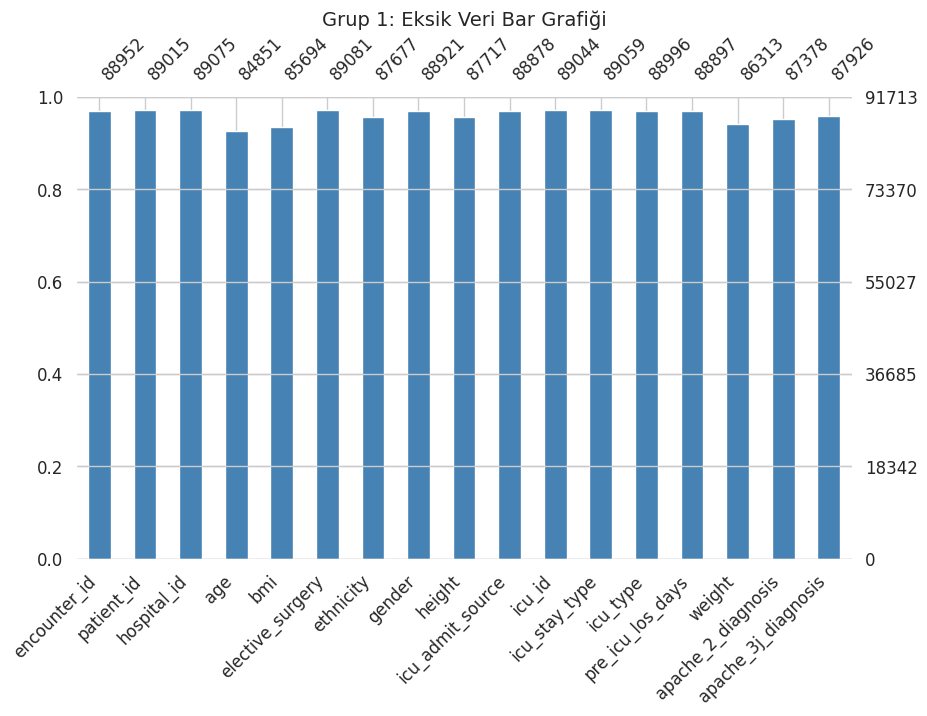

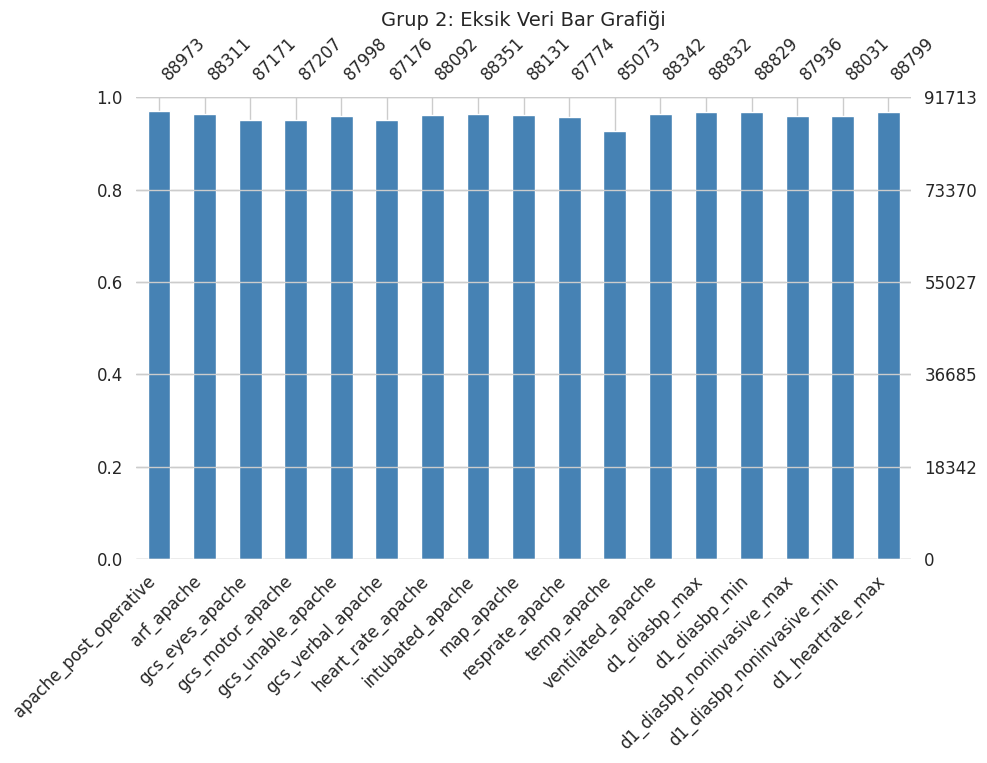

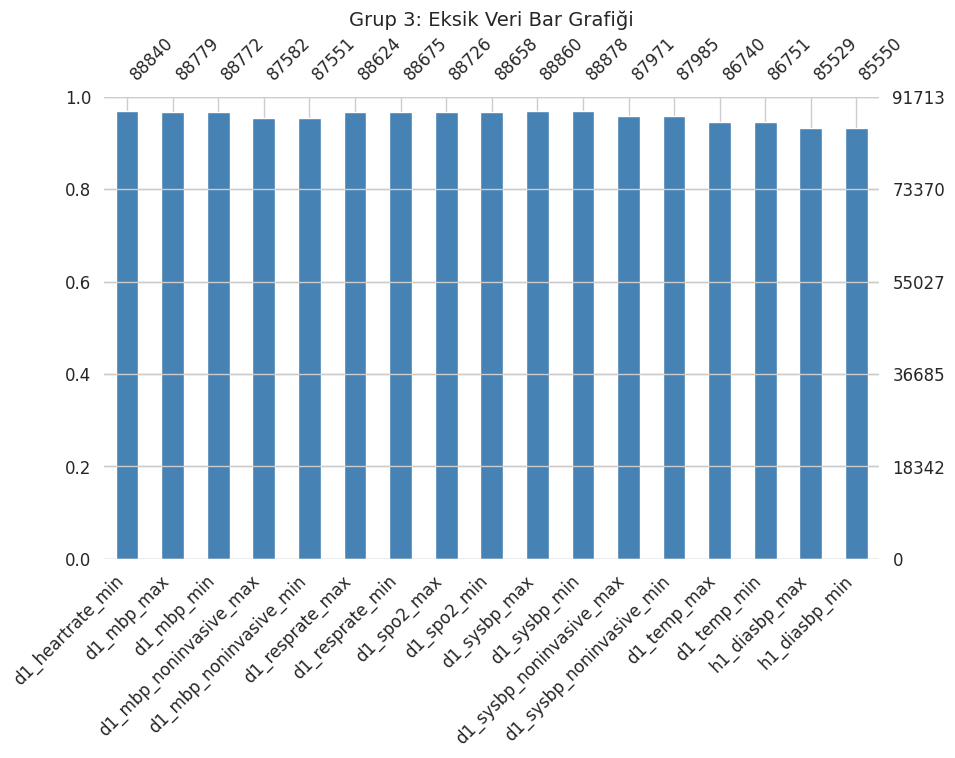

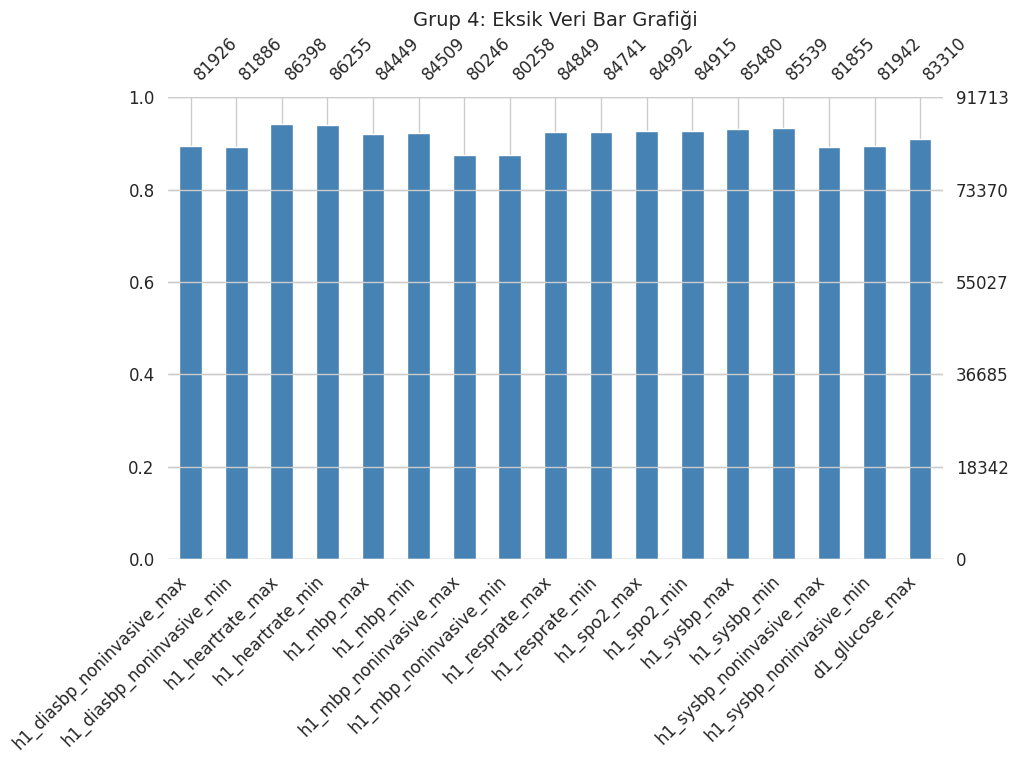

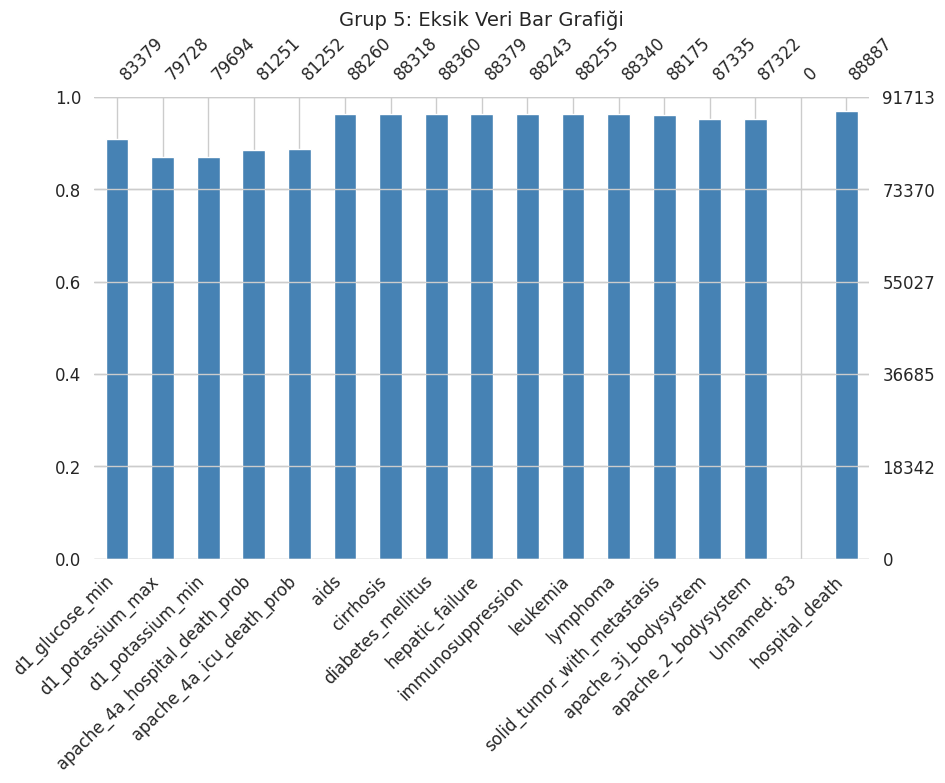

In [191]:
import missingno as msno
import matplotlib.pyplot as plt

# Sütunları 5 gruba bölelim
num_columns = df.shape[1]  # Toplam sütun sayısı
group_size = 85 // 5  # Kaç sütun bir grupta olacak
column_groups = [df.iloc[:, i:i + group_size] for i in range(0, num_columns, group_size)]

# Grupları görselleştirelim
for idx, group in enumerate(column_groups):
    plt.figure(figsize=(10, 6))  # Her grup için ayrı bir grafik
    msno.bar(group, 
             figsize=(10, 6), 
             fontsize=12, 
             color='steelblue')
    plt.title(f"Grup {idx + 1}: Eksik Veri Bar Grafiği", fontsize=14)
    plt.show()

Isı haritası (heatmap) kullanarak eksik verilerin görselleştirilmesi, verideki eksik değerlerin nerelerde yoğunlaştığını hızlı bir şekilde analiz etmeye olanak tanır. missingno kütüphanesinin sağladığı heatmap fonksiyonu, eksik veriler ile tamamlanmış veriler arasındaki korelasyonu gösterir. Bu tür görselleştirmeler, özellikle büyük veri setlerinde eksik verilerin yerlerini analiz etmek için faydalıdır.

<Figure size 1000x600 with 0 Axes>

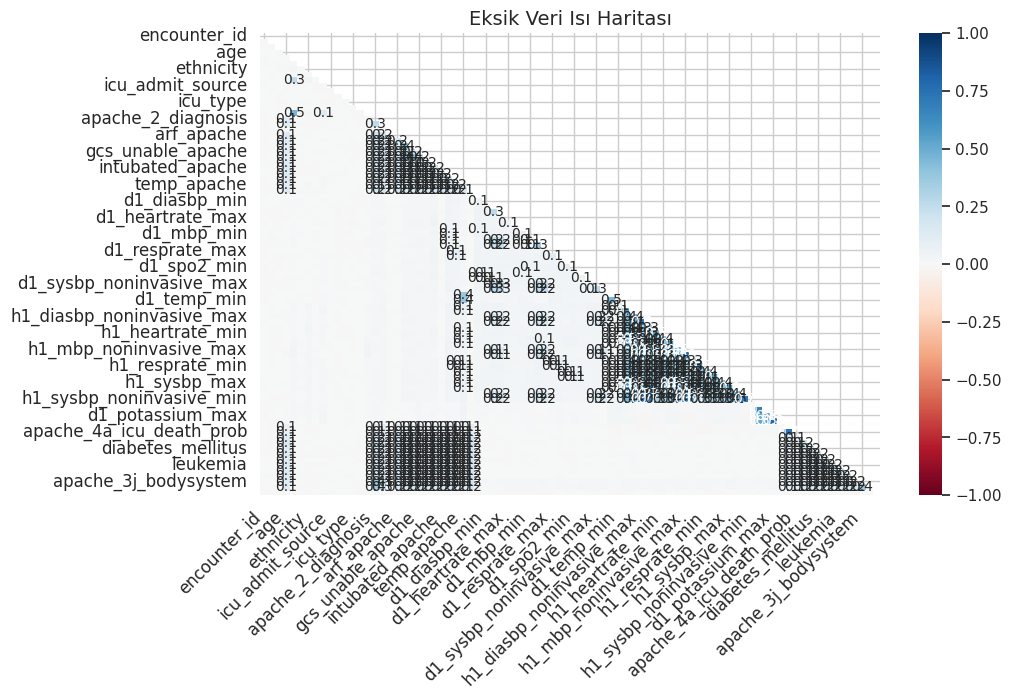

In [192]:
# Eksik veri ısı haritasını oluşturuyoruz
plt.figure(figsize=(10, 6))  # Görselleştirme boyutunu ayarlıyoruz
msno.heatmap(df, figsize=(10, 6), fontsize=12)
plt.title('Eksik Veri Isı Haritası', fontsize=14)
plt.show()

# Eksik Verilerin Silinmesi

Eksik veri analizi sırasında, veri setindeki eksik değerler çeşitli yöntemlerle ele alınabilir. Bu yöntemlerden biri de **eksik verilerin silinmesidir**. Ancak, eksik verilerin silinmesi işlemi, veri analizi sürecinde dikkatlice uygulanması gereken bir adımdır, çünkü bu işlem bazı önemli bilgilerin kaybolmasına yol açabilir.

## Ne Zaman Eksik Veriler Silinir?

Eksik veriler, şu durumlarda veri setinden silinebilir:

- **Eksik veriler yüksek oranda**: Eğer bir sütundaki eksik veri oranı çok yüksekse, bu sütunun veri analizi için yeterli katkı sağlayamayacağı düşünülebilir. Bu durumda, sütunun tamamen silinmesi daha uygun olabilir.
- **Eksik veriler rastgele dağılmışsa**: Eğer eksik veriler rastgele dağılmışsa ve çok fazla kayoluşturmayacaksamayacaksa, satırlar eksik verilerle birlikte silinebilir.
- **Eksik veri sayısı küçükse**: Veri setinde çok az sayıda eksik veri varsa ve bu eksik veriler sadece birkaç satırda yer alıyorsa, bu satırlar silinerek veri kaybı minimuma indirilebilir.

## Silme Yöntemleri

Eksik verilerin silinmesi işlemi iki şekilde yapılabilir:

1. **Satır Bazında Silme**: 
   Veri setindeki belirli satırlarda eksik veriler varsa, yalnızca o satırlar silinebilir. Bu yöntem, özellikle eksik verilerin rastgele ve sayıca az olduğu durumlarda uygundur.

2. **Sütun Bazında Silme**:
   Veri setindeki bir sütunun tamamında eksik veriler varsa, o sütun tamamen silinebilir. Eğer bu sütunun veri setine katkısı yoksa ya da çok fazla eksik veri içeriyorsa, silinmesi daha mantıklı olabilir.

## Potansiyel Riskler ve Dikkat Edilmesi Gerekenler

Eksik verilerin silinmesi işlemi her zaman önerilmez, çünkü:

- **Veri Kaybı**: Verilerin silinmesi, özellikle önemli sütunlarda veya satırlarda eksik değerler bulunuyorsa, bilgi kaybına yol açabilir. Bu kayıp, analiz sonuçlarını olumsuz etkileyebilir.
- **Dağılım Değişimi**: Eğer veriler rastgele eksikse, eksik verilerin silinmesi veri setindeki dağılımı değiştirebilir. Bu durum, modelin eğitim süreçlerinde yanıltıcı sonuçlar doğurabilir.
  
## Silme İşlemi Sonrası Kontrol

Eksik verilerin silinmesi sonrasında, veri setindeki kalan verilerin uygun şekilde dağılıp dağılmadığını kontrol etmek önemlidir. Veri setindeki eksikliklerin durumu tekrar gözden geçirilerek, eksik v dikkatlice değerlendirilmelidir.

Sütunlar içerisinde 'Unnamed: 83' adlı değişken %100 eksikliğe sahip bu yüzden bu değişkeni silebiliriz

In [193]:
# Tamamen eksik olan sütunu doğrulama 

for i in df.columns:
    if df[i].isna().all():
        print("Tamamen eksik olan sütun:", i)

Tamamen eksik olan sütun: Unnamed: 83


### `drop()` Fonksiyonu

`drop()` fonksiyonu, pandas DataFrame'lerinden sütun veya satır silmek için kullanılır. 

- **Sütun Silme**: `axis=1` parametresiyle belirtilen sütunları silebilirsiniz.
- **Satır Silme**: `axis=0` parametresiyle belirtilen satırları silebilirsiniz.
- **inplace**: Eğer `inplace=True` kullanılırsa, işlem DataFrame üzerinde kalıcı olur ve yeni bir değişkene atama yapmanız gerekmez.

Bu fonksiyon, belirtilen sütun veya satırları silerek DataFrame'inizi günceller. Eğer değigeçicii kalıcı olarkyapmamak isterseniz, `inplace=False` (varsayılan) kullanarak, işlem sonucunu yeni bir DataFrame olarak alabilirsiniz.

In [194]:
# Unnamed: 83 sütunu kalıcı olarak silme

df.drop('Unnamed: 83', axis=1, inplace=True)

# güncel sütun sayısını kontrol etme (84'e düşmesini bekliyoruz)

len(df.columns)

84

encounter_id,patient_id,hospital_id değişkenleri eşsiz kimlik numaralarıdır ve "hastane içi ölüm" konusunda
bir etkileri yoktur eğer bir makine öğrenmesi modeli oluşturacak olsaydık modelimizi eğiteceğimiz veri setinde bu sürunları tamamen kaldırabilirdik.

Şimdilik eksik kısımları rastgele eşsiz değerler ile dolduralım id

## Eksik Verilerin Doldurulması

Eksik veriler, veri analizi süreçlerinde karşılaşılan yaygın bir sorundur ve genellikle iki ana yöntemle ele alınır: **veri silme** ve **veri doldurma**. Bu bölümde, eksik verilerin doldurulması süreci ve yaygın yöntemler ele alınacaktır.

### Neden Eksik Veriler Doldurulur?

Eksik veriler, analizlerin doğruluğunu etkileyebilir. Bu nedenle, eksik verilerin uygun şekilde doldurulması, daha sağlıklı ve güvenilir sonuçlar elde edilmesini sağlar. Eksik verilerin doldurulması, özellikle makine öğrenmesi modellerinin eğitimi ve istatistiksel analizlerde önemlidir.

### Yaygın Doldurma Yöntemleri

1. **Ortalama ile Doldurma**:
   - **Numerik veri** için eksik değerler, sütunun ortalaması ile doldurulabilir. Bu yöntem, verilerin dağılımını büyük ölçüde etkilemez ve basit bir yaklaşımdır.
   - Kullanım: `df[column] = df[column].fillna(df[column].mean())`

2. **Medyan ile Doldurma**:
   - **Numerik veri** için, ortalama yerine medyan kullanılabilir. Bu yöntem, özellikle verinin uç değerlerden (outliers) etkilenmesini istemediğimizde tercih edilir.
   - Kullanım: `df[column] = df[column].fillna(df[column].median())`

3. **Mod ile Doldurma**:
   - **Kategorik veri** için, eksik değerler en sık görülen (mod) değer ile doldurulabilir.
   - Kullanım: `df[column] = df[column].fillna(df[column].mode()[0])`

4. **Önceki/sonraki değer ile doldurma (Forward/Backward Fill)**:
   - Bu yöntem, zaman serisi verileri için kullanışlıdır. Eksik değerler, sırasıyla bir önceki veya sonraki geçerli veri ile doldurulabilir.
   - Kullanım:
     - İleri doldurma (forward fill): `df[column] = df[column].fillna(method='ffill')`
     - Geriye doğru doldurma (backward fill): `df[column] = df[column].fillna(method='bfill')`

5. **Tahmin ile Doldurma**:
   - Makine öğrenmesi teknikleriyle, eksik veri değerleri bir model (örneğin, doğrusal regresyon) kullanılarak tahmin edilebilir.
   - Bu yöntem, verinin karmaşıklığına göre daha doğru sonuçlar verebilir, ancak daha fazla işlem süresi gerektirir.

### Doldurmanın Potansiyel Etkileri

- **Yanlılık (Bias)**: Eksik verilerin doldurulması, veri setinde yanlılık yaratabilir. Özellikle ortalama, medyan veya mod ile doldurma, veri setinin orijinal dağılımını değiştirebilir.
- **Veri Setinin Tutarlılığı**: Eksik verileri doğru şekilde doldurmak, analizlerin tutarlılığını sağlar. Yanlış veya uygunsuz doldurma yöntemleri, modelin başarısını olumsuz yönde etkileyebilir.
- **Veri Bütünlüğü**: Veri doldurulurken, orijinal verinin mantığı ve ilişkileri korunmalıdır. Bu nedenle, her durumda uygun bisonuçların güvenilirliğini artıracaktır.

Veri yapısnı tekrar gözden geçirelim ve eksik verilerin nasıl doldurulacağına karar verelim

In [195]:
# 3 örnek veri almak için her sütun için döngü
example_values = []

for column in df.columns:
    # Her sütundan 3 örnek veri al
    examples = df[column].dropna().head(3).tolist()
    
    # Eşsiz değerlerin sayısını al
    unique_count = df[column].nunique()
    
    # Sütun adı, örnek veriler ve eşsiz değer sayısını listeye ekle
    example_values.append([column, examples, unique_count])

# DataFrame
example_df = pd.DataFrame(example_values, columns=["Column Name", "Examples", "Unique Values Count"])

# Tablo
pd.set_option('display.max_colwidth', None)  # Kolonlardaki verinin tamamının gözükmesi için


example_df

,Column Name,Examples,Unique Values Count
0,encounter_id,"[66154.0, 114252.0, 119783.0]",88952
1,patient_id,"[25312.0, 50777.0, 46918.0]",89015
2,hospital_id,"[118.0, 81.0, 118.0]",147
3,age,"[68.0, 77.0, 25.0]",74
4,bmi,"[22.73, 27.42, 31.95]",34284
5,elective_surgery,"[0.0, 0.0, 0.0]",2
6,ethnicity,"[Caucasian, Caucasian, Caucasian]",6
7,gender,"[M, F, F]",2
8,height,"[180.3, 160.0, 172.7]",399
9,icu_admit_source,"[Floor, Floor, Accident & Emergency]",5


In [196]:
# 1. encounter_id sütununu rastgele 5 basamaklı sayılarla doldur
df['encounter_id'] = df['encounter_id'].apply(
    lambda x: x if not np.isnan(x) else np.random.randint(10000, 99999)
)

# 2. patient_id sütununu rastgele 5 basamaklı sayılarla doldur
df['patient_id'] = df['patient_id'].apply(
    lambda x: x if not np.isnan(x) else np.random.randint(10000, 99999)
)

# 3. hospital_id sütununu eksik olmayan değerlerden rastgele seçerek doldur
non_missing_hospital_ids = df['hospital_id'].dropna().unique()
df['hospital_id'] = df['hospital_id'].apply(
    lambda x: x if not np.isnan(x) else np.random.choice(non_missing_hospital_ids)
)


şimdi sırada age ve bmi var öncelikle bu ikisi arasında bir ilişki olup olmadğını görelim

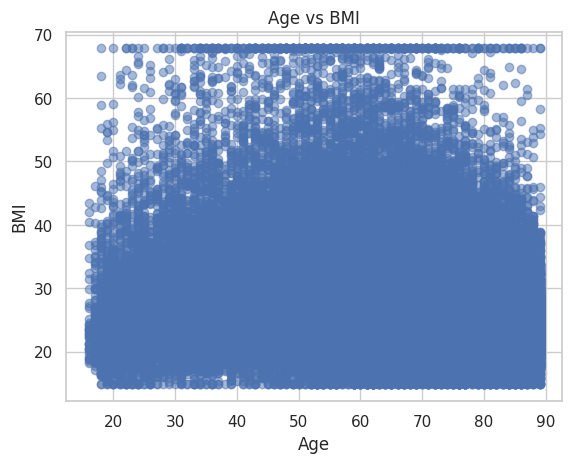

In [197]:
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['bmi'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.show()


In [198]:
correlation = df[['age', 'bmi']].corr()
print(correlation)


          age       bmi
age  1.000000 -0.085828
bmi -0.085828  1.000000


### **Sonuçların Yorumlanması**
**İlişki var mı?**
   - Korelasyon katsayısı \( -0.085828 \) olduğu için **yaş ve BMI arasında neredeyse hiçbir ilişki yok** denebilir.
   - İki değişkenin birbiriyle bağımlı olduğu sonucuna varmak yanlış olur.


- Yaş ve BMI bağımsız değişkenler gibi davranıyor.
- Bu nedenle BMI eksiklerini doldururken, yaş faktörünü dikkate almadan genel istatistiksel yöntemler (ortalama, medyan) kullanılabilir.

Öncelikle yaş eksik verilerini dolduracağız bunu hangi yöntemle yapacağımıza karar vermek için 
yaş değılımını gözlemlemeliyiz

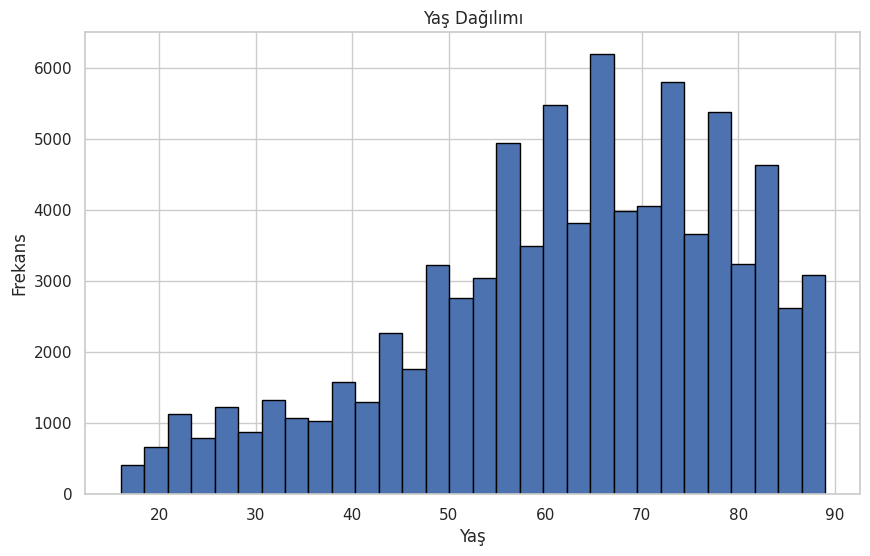

In [199]:
import matplotlib.pyplot as plt

# Yaş sütununun histogramını çizin
plt.figure(figsize=(10,6))
plt.hist(df['age'].dropna(), bins=30, edgecolor='black')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()


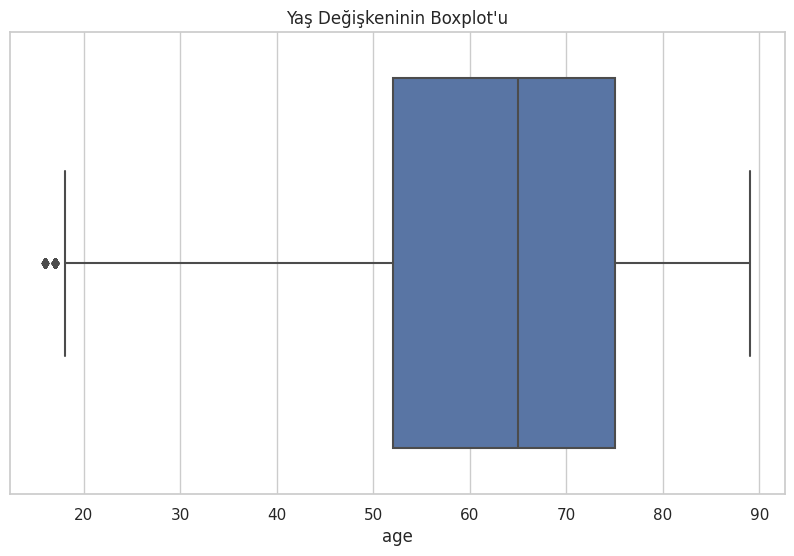

In [200]:
import seaborn as sns

# Yaş değişkeninin boxplotunu çizin
plt.figure(figsize=(10,6))
sns.boxplot(x=df['age'])
plt.title('Yaş Değişkeninin Boxplot\'u')
plt.show()


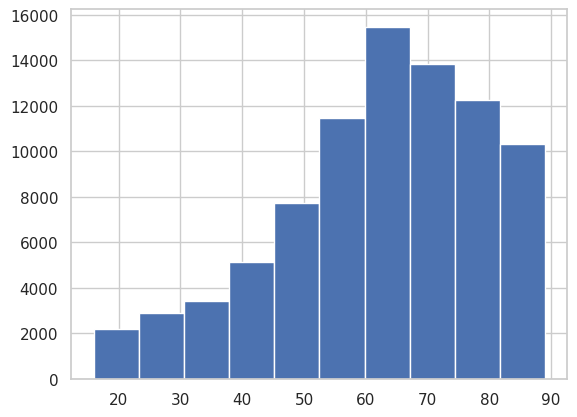

In [201]:
plt.hist(df["age"])
plt.show()

Yaş değişkenini medyan ile dolurmak daha sağlıklı olacaktır çünkü histogramdan ve diğer görselleştirmelerden de görüleceği üzere sola kuyruklu yani yaşlıların daha fazla olduğunu ve simetrik bir dağılımın oluşmadığını görüyoruz

In [202]:
# age sütununu medyan ile doldurma
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

/tmp/ipykernel_30/2506808121.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


BMI için de aynı gözlemi yapalım ve nasıl dolduracağımıza karar verelim

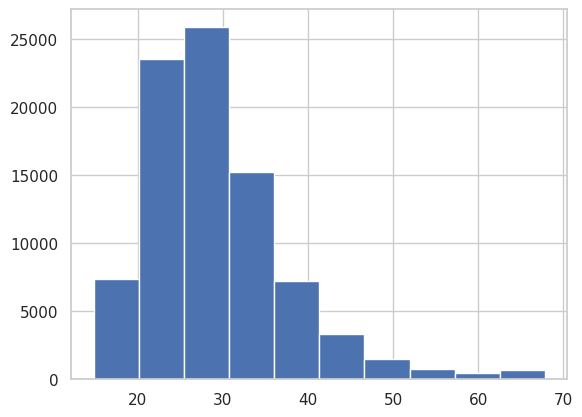

In [203]:
plt.hist(df["bmi"])
plt.show()

In [204]:
# age'de olduğu gibi yine medyan ile dolurmalıyız

median_age = df['bmi'].median()
df['bmi'].fillna(median_age, inplace=True)

/tmp/ipykernel_30/174442920.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(median_age, inplace=True)


In [205]:
# Elective surgery sütunundaki değerlerin dağılımını görmek
print(df['elective_surgery'].value_counts())

elective_surgery
0.0    72710
1.0    16371
Name: count, dtype: int64


elective_surgery sütununda 0.0 (cerrahi yapılmayan) değeri çok daha fazla gözlemleniyor (72710 vs 16371). Bu durumda, eksik verileri doldururken 0.0 ile doldurmak daha mantıklı olacaktır çünkü veri setinde 0.0 çok daha yaygın.

In [206]:
df['elective_surgery'].fillna(0.0, inplace=True)

/tmp/ipykernel_30/3848065345.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['elective_surgery'].fillna(0.0, inplace=True)


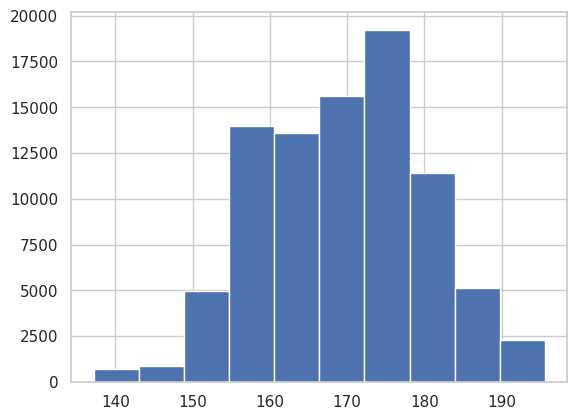

In [207]:
plt.hist(df["height"])
plt.show()

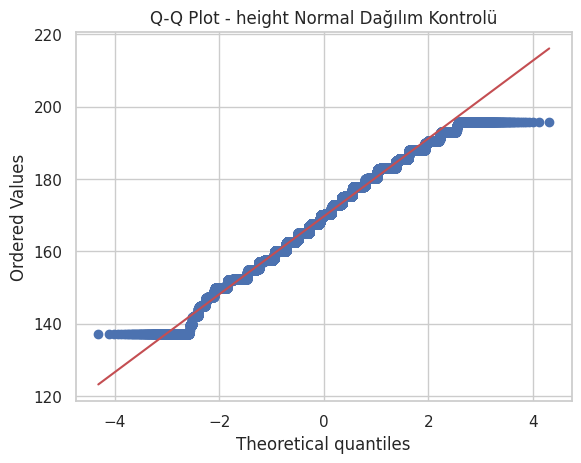

In [208]:
# Sütun adı ile veri setinden veri alma

from scipy import stats

column_name = 'height'  
data = df[column_name].dropna()  

# Q-Q plot'u oluşturma
stats.probplot(data, dist="norm", plot=plt)

# Grafiği göster
plt.title(f"Q-Q Plot - {column_name} Normal Dağılım Kontrolü")
plt.show()

Boy dağılımı neredeyse düzgün dağılmış bir vaziyette bu yüzden ortalamayla doldurabiliriz

In [209]:
# Ortalama hesaplama
mean_height = df['height'].mean()

# Eksik verileri ortalama ile doldurma
df['height'].fillna(mean_height, inplace=True)

/tmp/ipykernel_30/3709123342.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['height'].fillna(mean_height, inplace=True)


icu_id ise bir hastanın yoğun bakım ünitesine (ICU - Intensive Care Unit) ait kimlik numarasını temsil eder.

In [210]:
# sütundaki değerlerin dağılımını görmek
print(df['icu_id'].value_counts())

icu_id
646.0    1285
653.0    1266
876.0    1231
413.0    1203
236.0    1102
337.0    1080
133.0    1013
434.0     965
840.0     919
404.0     916
895.0     909
114.0     905
376.0     879
369.0     875
657.0     859
391.0     854
92.0      854
855.0     835
608.0     823
504.0     817
95.0      794
464.0     794
622.0     790
513.0     789
498.0     784
489.0     776
324.0     767
711.0     756
798.0     743
408.0     738
809.0     718
251.0     716
687.0     714
685.0     714
709.0     695
678.0     690
619.0     682
212.0     660
623.0     658
697.0     657
684.0     654
628.0     647
841.0     646
97.0      641
384.0     631
347.0     630
374.0     624
616.0     623
491.0     618
451.0     611
829.0     604
869.0     602
495.0     591
490.0     590
543.0     583
523.0     579
90.0      564
594.0     560
259.0     550
609.0     549
889.0     546
601.0     541
775.0     539
394.0     534
607.0     531
286.0     525
307.0     524
267.0     522
708.0     520
481.0     515
683.0     514

Bu verilere bakıldığında, belirli ICU ID'lerinin çok daha yaygın olduğunu (örneğin, 646.0, 653.0, 876.0) görebiliyoruz. Bu durumda, mod (en yaygın ID) ile doldurma yöntemi daha mantıklı olacaktır çünkü bu yöntem, verinin mevcut dağılımına daha uygun bir sonuç verir.

In [211]:
# En yaygın ICU ID'yi bulma (mod)
most_common_icu_id = df['icu_id'].mode()[0]

# Eksik verileri en yaygın ICU ID ile doldurma
df['icu_id'].fillna(most_common_icu_id, inplace=True)

/tmp/ipykernel_30/122379807.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['icu_id'].fillna(most_common_icu_id, inplace=True)


In [212]:
# pre_icu_los_days sütununun maksimum, minimum ve ortalama değerler
max_value = df['pre_icu_los_days'].max()
min_value = df['pre_icu_los_days'].min()
mean_value = df['pre_icu_los_days'].mean()

# Sonuçları yazdır
print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")
print(f"Mean Value: {mean_value}")


Maximum Value: 159.0909722
Minimum Value: -24.94722222
Mean Value: 0.834198793415852


In [213]:
# Ortalama hesaplama
mean_height = df['pre_icu_los_days'].mean()

# Eksik verileri ortalama ile doldurma
df['pre_icu_los_days'].fillna(mean_height, inplace=True)

/tmp/ipykernel_30/2764076531.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pre_icu_los_days'].fillna(mean_height, inplace=True)


In [214]:
# Ortalama hesaplama
mean_height = df['weight'].mean()

# Eksik verileri ortalama ile doldurma
df['weight'].fillna(mean_height, inplace=True)

/tmp/ipykernel_30/2174659709.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].fillna(mean_height, inplace=True)


In [215]:
# apache_2_diagnosis ve apache_3j_diagnosis için ortalama
apache_2_mean = df['apache_2_diagnosis'].mean()
apache_3j_mean = df['apache_3j_diagnosis'].mean()

# Eksik değerleri ortalama ile doldurun
df['apache_2_diagnosis'].fillna(apache_2_mean, inplace=True)
df['apache_3j_diagnosis'].fillna(apache_3j_mean, inplace=True)

/tmp/ipykernel_30/4130108225.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['apache_2_diagnosis'].fillna(apache_2_mean, inplace=True)
/tmp/ipykernel_30/4130108225.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [216]:
# apache_post_operative sütundaki değerlerin dağılımını görmek
print(df['apache_post_operative'].value_counts())

apache_post_operative
0.0    71079
1.0    17894
Name: count, dtype: int64


0'lar çok yaygın tepe değer olan 0 ile eksikleri dolduralım

In [217]:
apache_post_operative_mode = df['apache_2_diagnosis'].mode()[0]  

df['apache_post_operative'].fillna(apache_post_operative_mode, inplace=True)

/tmp/ipykernel_30/3076627041.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['apache_post_operative'].fillna(apache_post_operative_mode, inplace=True)


In [218]:
print(df['arf_apache'].value_counts())

arf_apache
0.0    85835
1.0     2476
Name: count, dtype: int64


In [219]:
arf_apache_mode = df['arf_apache'].mode()[0]  

df['arf_apache'].fillna(arf_apache_mode, inplace=True)

/tmp/ipykernel_30/758316618.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['arf_apache'].fillna(arf_apache_mode, inplace=True)


In [220]:
print(df['gcs_eyes_apache'].value_counts())

gcs_eyes_apache
4.0    61138
3.0    13457
1.0     8051
2.0     4525
Name: count, dtype: int64


In [221]:
mode = df['gcs_eyes_apache'].mode()[0]  

df['gcs_eyes_apache'].fillna(mode, inplace=True)

/tmp/ipykernel_30/149382779.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gcs_eyes_apache'].fillna(mode, inplace=True)


In [222]:
print(df['gcs_motor_apache'].value_counts())

gcs_motor_apache
6.0    68910
5.0     7742
1.0     5385
4.0     4362
3.0      508
2.0      300
Name: count, dtype: int64


In [223]:
mode = df['gcs_motor_apache'].mode()[0]  

df['gcs_motor_apache'].fillna(mode, inplace=True)

/tmp/ipykernel_30/418324149.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gcs_motor_apache'].fillna(mode, inplace=True)


In [224]:
print(df['gcs_unable_apache'].value_counts())

gcs_unable_apache
0.0    87162
1.0      836
Name: count, dtype: int64


In [225]:
mode = df['gcs_unable_apache'].mode()[0]  

df['gcs_unable_apache'].fillna(mode, inplace=True)

/tmp/ipykernel_30/1727114812.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gcs_unable_apache'].fillna(mode, inplace=True)


In [226]:
print(df['gcs_verbal_apache'].value_counts())

gcs_verbal_apache
5.0    55237
1.0    16253
4.0    10630
3.0     3173
2.0     1883
Name: count, dtype: int64


In [227]:
mode = df['gcs_verbal_apache'].mode()[0]  

df['gcs_verbal_apache'].fillna(mode, inplace=True)

/tmp/ipykernel_30/2136636872.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gcs_verbal_apache'].fillna(mode, inplace=True)


In [228]:
# heart_rate_apache sütununun maksimum, minimum ve ortalama değerler
max_value = df['heart_rate_apache'].max()
min_value = df['heart_rate_apache'].min()
mean_value = df['heart_rate_apache'].mean()

# Sonuçları yazdır
print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")
print(f"Mean Value: {mean_value}")

Maximum Value: 178.0
Minimum Value: 30.0
Mean Value: 99.72714888979704


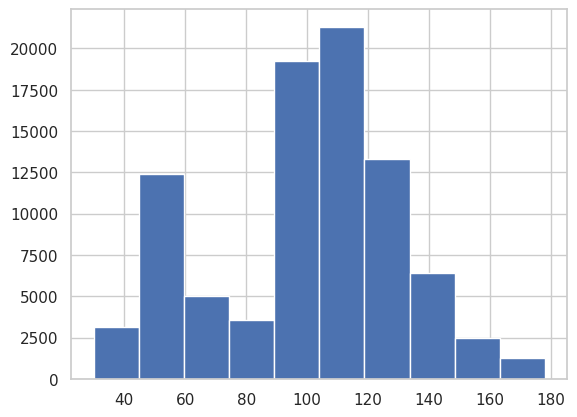

In [229]:
plt.hist(df["heart_rate_apache"])
plt.show()

In [230]:
# Ortalama hesaplama
mean_height = df['heart_rate_apache'].mean()

# Eksik verileri ortalama ile doldurma
df['heart_rate_apache'].fillna(mean_height, inplace=True)

/tmp/ipykernel_30/1525935163.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['heart_rate_apache'].fillna(mean_height, inplace=True)


In [231]:
print(df['intubated_apache'].value_counts())

intubated_apache
0.0    75000
1.0    13351
Name: count, dtype: int64


In [232]:
mode = df['intubated_apache'].mode()[0]  

df['intubated_apache'].fillna(mode, inplace=True)

/tmp/ipykernel_30/3155224515.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['intubated_apache'].fillna(mode, inplace=True)


In [233]:
# map_apache

# sütununun maksimum, minimum ve ortalama değerler
max_value = df['map_apache'].max()
min_value = df['map_apache'].min()
mean_value = df['map_apache'].mean()

# Sonuçları yazdır
print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")
print(f"Mean Value: {mean_value}")

Maximum Value: 200.0
Minimum Value: 40.0
Mean Value: 87.99118357899037


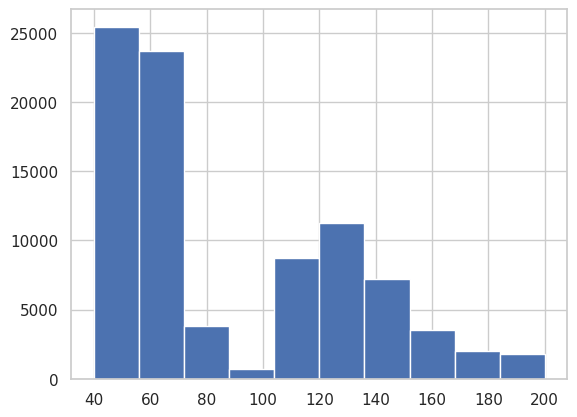

In [234]:
plt.hist(df["map_apache"])
plt.show()

In [235]:
# Ortalama hesaplama
mean_height = df['map_apache'].mean()

# Eksik verileri ortalama ile doldurma
df['map_apache'].fillna(mean_height, inplace=True)

/tmp/ipykernel_30/3448933864.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['map_apache'].fillna(mean_height, inplace=True)


In [236]:
# resprate_apache	

# sütununun maksimum, minimum ve ortalama değerler
max_value = df['resprate_apache'].max()
min_value = df['resprate_apache'].min()
mean_value = df['resprate_apache'].mean()

# Sonuçları yazdır
print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")
print(f"Mean Value: {mean_value}")

Maximum Value: 60.0
Minimum Value: 4.0
Mean Value: 25.826920272518052


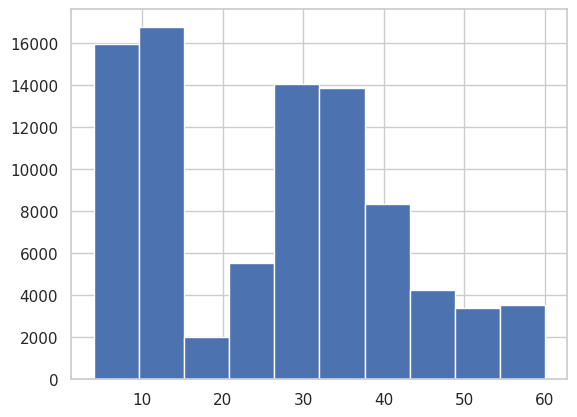

In [237]:
plt.hist(df["resprate_apache"])
plt.show()

In [238]:
print(df['resprate_apache'].value_counts())

resprate_apache
10.0    4168
12.0    4066
11.0    3803
4.0     3430
9.0     3324
30.0    3064
28.0    2985
8.0     2843
29.0    2808
31.0    2659
32.0    2586
27.0    2565
33.0    2552
35.0    2403
34.0    2357
7.0     2331
13.0    2312
26.0    2220
36.0    2145
6.0     2037
5.0     1998
14.0    1831
37.0    1806
38.0    1791
39.0    1573
25.0    1482
40.0    1431
41.0    1328
16.0    1222
42.0    1156
24.0    1081
43.0    1077
44.0     961
60.0     915
45.0     914
46.0     871
47.0     783
48.0     725
50.0     648
59.0     646
49.0     630
15.0     608
52.0     561
51.0     536
58.0     509
53.0     507
55.0     493
57.0     491
54.0     490
56.0     477
18.0     387
23.0     360
22.0     341
20.0     323
17.0      70
21.0      59
19.0      14
9.4        3
8.6        2
7.1        2
31.6       1
7.2        1
7.8        1
9.9        1
9.5        1
5.9        1
36.1       1
33.2       1
31.7       1
32.7       1
33.6       1
40.4       1
26.5       1
8.4        1
Name: count, dtype: in

In [239]:
# Ortalama hesaplama
mean_height = df['resprate_apache'].mean()

# Eksik verileri ortalama ile doldurma
df['resprate_apache'].fillna(mean_height, inplace=True)

/tmp/ipykernel_30/592856029.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['resprate_apache'].fillna(mean_height, inplace=True)


In [240]:
# temp_apache	

# sütununun maksimum, minimum ve ortalama değerler
max_value = df['temp_apache'].max()
min_value = df['temp_apache'].min()
mean_value = df['temp_apache'].mean()

# Sonuçları yazdır
print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")
print(f"Mean Value: {mean_value}")

Maximum Value: 39.7
Minimum Value: 32.1
Mean Value: 36.41452340930731


In [241]:
# Ortalama hesaplama
mean_height = df['temp_apache'].mean()

# Eksik verileri ortalama ile doldurma
df['temp_apache'].fillna(mean_height, inplace=True)

/tmp/ipykernel_30/1292411965.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['temp_apache'].fillna(mean_height, inplace=True)


In [242]:
# ventilated_apache	

print(df['ventilated_apache'].value_counts())

ventilated_apache
0.0    59559
1.0    28783
Name: count, dtype: int64


In [243]:
mode = df['ventilated_apache'].mode()[0]  

df['ventilated_apache'].fillna(mode, inplace=True)

/tmp/ipykernel_30/1465420155.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ventilated_apache'].fillna(mode, inplace=True)


In [244]:
# d1_diasbp_max

a = "d1_diasbp_max"
# sütununun maksimum, minimum ve ortalama değerler
max_value = df[a].max()
min_value = df[a].min()
mean_value = df[a].mean()

# Sonuçları yazdır
print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")
print(f"Mean Value: {mean_value}")

Maximum Value: 165.0
Minimum Value: 46.0
Mean Value: 88.50527962896254


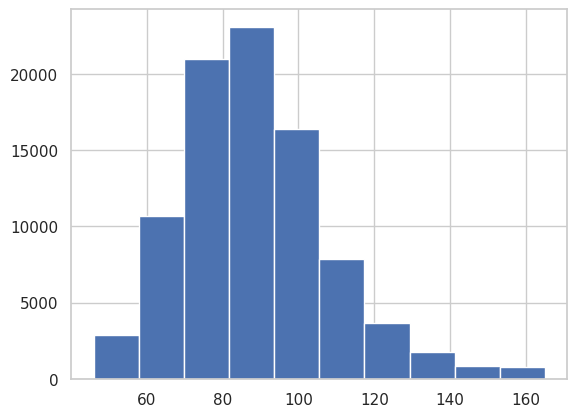

In [245]:
plt.hist(df["d1_diasbp_max"])
plt.show()

Küçük de olsa ufak bir kuyruklanma olduğu için ortlama ile dolduralım

In [246]:
# Ortalama hesaplama
mean_height = df['d1_diasbp_max'].mean()

# Eksik verileri ortalama ile doldurma
df['d1_diasbp_max'].fillna(mean_height, inplace=True)

/tmp/ipykernel_30/1340151884.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['d1_diasbp_max'].fillna(mean_height, inplace=True)


In [247]:
# d1_diasbp_min	

a = "d1_diasbp_min"
# sütununun maksimum, minimum ve ortalama değerler
max_value = df[a].max()
min_value = df[a].min()
mean_value = df[a].mean()

# Sonuçları yazdır
print(f"Maximum Value: {max_value}")
print(f"Minimum Value: {min_value}")
print(f"Mean Value: {mean_value}")

Maximum Value: 90.0
Minimum Value: 13.0
Mean Value: 50.16621823953889


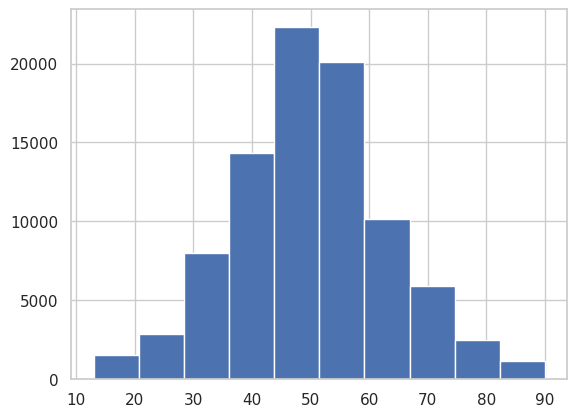

In [248]:
plt.hist(df["d1_diasbp_min"])
plt.show()

Simetrik bir histogram yapısı var medyan ile doldurabiliriz

In [249]:
d1_diasbp_min_median = df['d1_diasbp_min'].median()  

df['d1_diasbp_min'].fillna(d1_diasbp_min_median, inplace=True)

/tmp/ipykernel_30/1195643937.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['d1_diasbp_min'].fillna(d1_diasbp_min_median, inplace=True)


In [250]:
# VERİYİ GÖZDEN GEÇİRELİM

# 3 örnek veri almak için her sütun için döngü
example_values = []

for column in df.columns:
    # Her sütundan 3 örnek veri al
    examples = df[column].dropna().head(3).tolist()
    
    # Eşsiz değerlerin sayısını al
    unique_count = df[column].nunique()
    
    # Sütun adı, örnek veriler ve eşsiz değer sayısını listeye ekle
    example_values.append([column, examples, unique_count])

# DataFrame
example_df = pd.DataFrame(example_values, columns=["Column Name", "Examples", "Unique Values Count"])

# Tablo
pd.set_option('display.max_colwidth', None)  # Kolonlardaki verinin tamamının gözükmesi için


example_df

,Column Name,Examples,Unique Values Count
0,encounter_id,"[66154.0, 114252.0, 119783.0]",89799
1,patient_id,"[25312.0, 56011.0, 50777.0]",89835
2,hospital_id,"[118.0, 81.0, 44.0]",147
3,age,"[68.0, 77.0, 25.0]",74
4,bmi,"[22.73, 27.42, 31.95]",34284
5,elective_surgery,"[0.0, 0.0, 0.0]",2
6,ethnicity,"[Caucasian, Caucasian, Caucasian]",6
7,gender,"[M, F, F]",2
8,height,"[180.3, 160.0, 172.7]",400
9,icu_admit_source,"[Floor, Floor, Accident & Emergency]",5


Teker teker yapmak yerine bir döngü ile bazı sütunlardaki eksiklikleri dolduracağız ve bunu yaparken ortalama ile doldurma işlmei gerçekleştireceğiz çünkü bu sütunlar max min gibi değişkenler olduğu için en iyi doldurma yöntemi ortalama olacaktır

In [251]:
# 31.değişkenden 72.değişkene kadar olanları ortalama ile doldurma

# Doldurulacak sütunlar listesi
columns_to_fill = [
    'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 
    'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 
    'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 
    'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 
    'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 
    'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 
    'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 
    'h1_sysbp_noninvasive_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min', 
    'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob'
]

# Eksik değerleri sütun ortalamalarıyla doldurmak için döngü kullanıyoruz
for column in columns_to_fill:
    column_mean = df[column].mean()  # Sütun için ortalama hesapla
    df[column].fillna(column_mean, inplace=True)  

/tmp/ipykernel_30/1693146693.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(column_mean, inplace=True)


In [252]:
# aids

print(df['aids'].value_counts())

aids
0.0    88182
1.0       78
Name: count, dtype: int64


In [253]:
mode = df['aids'].mode()[0]  

df['aids'].fillna(mode, inplace=True)

/tmp/ipykernel_30/2820271555.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['aids'].fillna(mode, inplace=True)


In [254]:
liste = ["cirrhosis","diabetes_mellitus","hepatic_failure","immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis","hospital_death"]

for i in liste:
    print(i,df[i].value_counts())
    print("------------")

cirrhosis cirrhosis
0.0    86932
1.0     1386
Name: count, dtype: int64
------------
diabetes_mellitus diabetes_mellitus
0.0    68461
1.0    19899
Name: count, dtype: int64
------------
hepatic_failure hepatic_failure
0.0    87228
1.0     1151
Name: count, dtype: int64
------------
immunosuppression immunosuppression
0.0    85938
1.0     2305
Name: count, dtype: int64
------------
leukemia leukemia
0.0    87636
1.0      619
Name: count, dtype: int64
------------
lymphoma lymphoma
0.0    87976
1.0      364
Name: count, dtype: int64
------------
solid_tumor_with_metastasis solid_tumor_with_metastasis
0.0    86352
1.0     1823
Name: count, dtype: int64
------------
hospital_death hospital_death
0.0    81212
1.0     7675
Name: count, dtype: int64
------------


Yukarıdaki sütunlarda 0 değeri çok büyük bir farkla daha fazla bu yüzden eksik verileri 0 yani tepe değer ile doldurmalıyız

In [255]:
# Döngü ile doldurma işlmei

liste = ["cirrhosis","diabetes_mellitus","hepatic_failure","immunosuppression","leukemia","lymphoma","solid_tumor_with_metastasis","hospital_death"]

for i in liste:
    mode = df[i].mode()[0]
    df[i].fillna(mode, inplace=True)

/tmp/ipykernel_30/3019296482.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(mode, inplace=True)


In [256]:
# 3 örnek veri almak için her sütun için döngü
example_values = []

for column in df.columns:
    # Her sütundan 3 örnek veri al
    examples = df[column].dropna().head(3).tolist()
    
    # Eşsiz değerlerin sayısını al
    unique_count = df[column].nunique()
    
    # Sütun adı, örnek veriler ve eşsiz değer sayısını listeye ekle
    example_values.append([column, examples, unique_count])

# DataFrame
example_df = pd.DataFrame(example_values, columns=["Column Name", "Examples", "Unique Values Count"])

# Tablo
pd.set_option('display.max_colwidth', None)  # Kolonlardaki verinin tamamının gözükmesi için


example_df

,Column Name,Examples,Unique Values Count
0,encounter_id,"[66154.0, 114252.0, 119783.0]",89799
1,patient_id,"[25312.0, 56011.0, 50777.0]",89835
2,hospital_id,"[118.0, 81.0, 44.0]",147
3,age,"[68.0, 77.0, 25.0]",74
4,bmi,"[22.73, 27.42, 31.95]",34284
5,elective_surgery,"[0.0, 0.0, 0.0]",2
6,ethnicity,"[Caucasian, Caucasian, Caucasian]",6
7,gender,"[M, F, F]",2
8,height,"[180.3, 160.0, 172.7]",400
9,icu_admit_source,"[Floor, Floor, Accident & Emergency]",5


Bütün sayısal değişkenlerimizin içinde bulunan eksik verilerin tamamını dolduruk bunu yaparken bir kaç farklı yöntem kullandık bunlar rastgele doldruma (hastane içi ölüme bir etkisi olmayan kimlik numara değişkenleri için), tepe değer(en çok tekrar eden değer ile doldurma), medyan ve ortalama ile doldurma idi. Şimdi sırada kategorik değişkenlerin doldurulması kısmı var.

### Kategorik Değişkenlerde Eksik Verilerin Doldurulması  

Kategorik değişkenlerde eksik verileri doldurmak, veri analizi sürecinde sık karşılaşılan bir durumdur. Eksik değerleri doldururken aşağıdaki stratejilerden biri tercih edilebilir:  

#### 1. **Tepe Değer (Mode) ile Doldurma**  
   - **Neden?** Kategorik değişkenlerin en sık görülen değeri, eksik değerleri doldurmak için doğal bir seçimdir. 
   - **Uygulama Alanı:** Eğer veri dağılımı dengeli değilse veya eksik veriler çok fazlaysa uygundur. 

#### 2. **Kategorik Değerler İçin "Bilinmiyor" (Unknown) Kategorisi Eklemek**  
   - **Neden?** Eksik değerlerin gerçek bir bilgi eksikliğini temsil ettiği durumlarda, bu yaklaşım eksik verilerin anlamını korur.
   - **Uygulama Alanı:** Veri analizi ve modelleme sürecinde eksik değerlerin etkisini açıkça göstermek isterseniz kullanılır.

#### 3. **Yakın Değerlerle Tahmin Etmek**  
   - **Neden?** Eksik değerlerin doldurulmasında, benzer özelliklere sahip gözlemlerden yararlanılabilir.  
   - **Uygulama Alanı:** Daha karmaşık yöntemlerin gerektiği ve eksik verilerin dolaylı olarak çıkarılabileceği durumlarda kullanılır (ör. gruplar bazında tepe değeri seçmek).

#### 4. **Kategorik Değerlerin Frekans Dağılımına Dayalı Doldurma**  
   - **Neden?** Eksik değerlerin mevcut kategoriler arasındaki oranlarla orantılı olarak doldurulması, veri dağılımının orijinal yapısını korur.
   - **Uygulama Alanı:** Eğitim verisi ile test verisinin aynı dağılıma sahip olması gerektiği durumlarda faydalıdır.

#### 5. **Eksik Veriyi Olduğu Gibi Bırakmak (Sadece İleri Analiz İçin Etiketlemek)**  
   - **Neden?** Eksik değerlerin belirgin bir anlam taşıdığı durumlarda, bunları olduğu gibi bırakmak daha uygun olabilir. 
   - **Uygulama Alanı:** Özellikle modelleme sırasında eksiklik durumunu ayrı bir özellik olarak kullanmak istendiğinde tercih edilir.

#### 6. **Uzman Görüşü ile Doldurma**  
   - **Neden?** Alan bilgisine dayalı olarak eksik verilerin ne olması gerektiği tahmin edilebilir.
   - **Uygulama Alanı:** Özellikle domain uzmanlarının belirli kategoriler hakkında güçlü öngörülere sahip olduğu durumlarda.

---

### Seçilecek Yönteme Karar Verirken Dikkat Edilmesi Gerekenler  
- **Eksiklik Oranı:** Eksik veri yüzdesi yüksekse "Unknown" veya mode gibi yöntemler tercih edilebilir.  
- **Değişkenin Dağılımı:** Frekans dağılımı çok dengesizse, tepe değer ile doldurma yanıltıcı olabilir.  
- **Veri Setinin Özelliği:** Veriler zaman serisi, deneysel veya gözlemsel olabilir; bu bağlamda eksiklik stratejisi değişiklik gösterebilir.  
- **Analiz Amacı:** Analizin amacı (ör. modelleme, özetleme) eriler uygun şekilde doldurulabilir.

In [257]:
# Kategorik değişkenleri gözden geçirelim

categorical_columns = df.select_dtypes(include=['category']).columns

missing_data_summary_categorical = pd.DataFrame({
    'Sütun Adı': categorical_columns,
    'Eksik Veri Sayısı': df[categorical_columns].isna().sum(),
    'Eksik Olmayan Veri Sayısı': df[categorical_columns].notna().sum(),
    'Eksiklik Yüzdesi (%)': (df[categorical_columns].isna().sum() / df.shape[0]) * 100
}).reset_index(drop=True)

missing_data_summary_categorical

,Sütun Adı,Eksik Veri Sayısı,Eksik Olmayan Veri Sayısı,Eksiklik Yüzdesi (%)
0,ethnicity,4036,87677,4.400685
1,gender,2792,88921,3.044279
2,icu_admit_source,2835,88878,3.091165
3,icu_stay_type,2654,89059,2.893810
4,icu_type,2717,88996,2.962503
5,apache_3j_bodysystem,4378,87335,4.773587
6,apache_2_bodysystem,4391,87322,4.787762


In [258]:
# ethnicity	

print(df['ethnicity'].value_counts())

ethnicity
Caucasian           68606
African American     9267
Other/Unknown        4250
Hispanic             3682
Asian                1101
Native American       771
Name: count, dtype: int64


Ethnicity değişkeninin hastane içi ölümde bariz bir etkisi olup olmadığını gözlemlemeliyiz eğer bariz bir etki yoksa bu durumda eksik verileri tepe değer olan "Caucasian" ile doldurabiliriz

ethnicity
African American    7.553685
Asian               8.083560
Caucasian           8.448241
Hispanic            9.750136
Native American     8.430610
Other/Unknown       7.882353
Name: hospital_death, dtype: float64


/tmp/ipykernel_30/3614335257.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ethnicity_death_rate = df.groupby('ethnicity')['hospital_death'].mean() * 100


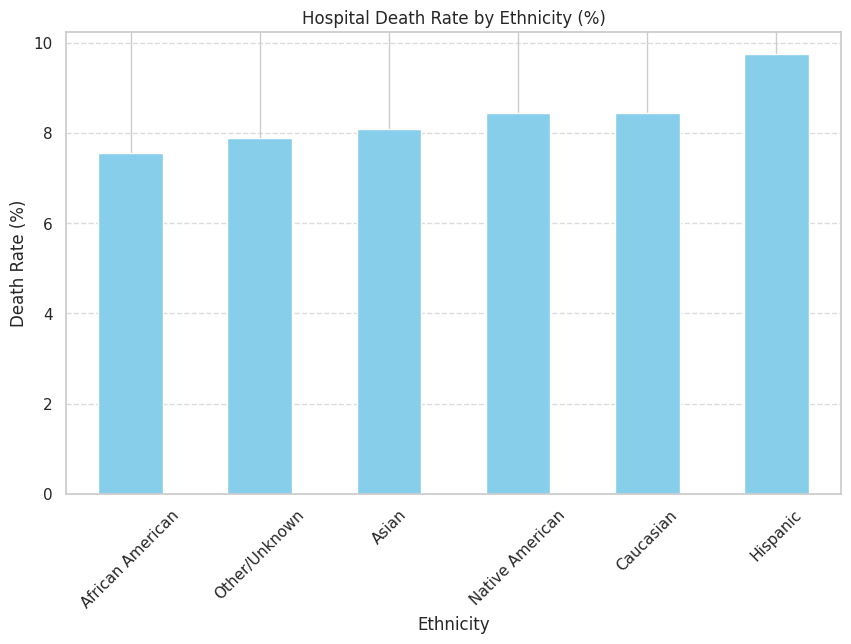

In [259]:
# Her etnik grup için hastane ölüm sayısını ve toplam sayısı

ethnicity_death_rate = df.groupby('ethnicity')['hospital_death'].mean() * 100

# Yüzdelik oranlar

print(ethnicity_death_rate)

# bar grafiği ile görselleştirme

ethnicity_death_rate.sort_values().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Hospital Death Rate by Ethnicity (%)')
plt.ylabel('Death Rate (%)')
plt.xlabel('Ethnicity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Bariz bir fark bulunmamakta yani hastane ölüm oranı etnik gruplardan bağımsız gözüküyor bu sebeple bu sütundaki eksik verileri tepe değer ile doldurabiliriz

In [260]:
mode = df['ethnicity'].mode()[0]  

df['ethnicity'].fillna(mode, inplace=True)

/tmp/ipykernel_30/775159669.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ethnicity'].fillna(mode, inplace=True)


Sırada cinsiyet değişkeni(gender) var aynı şekilde hastane içi ölüme cinsiyetin bir etkisi olup olmadığını gözlemleyelim

In [261]:
# gender

print(df['gender'].value_counts())

gender
M    47960
F    40961
Name: count, dtype: int64


In [262]:
# Her etnik grup için hastane ölüm sayısını ve toplam sayısı

gender_death_rate = df.groupby('gender')['hospital_death'].mean() * 100

# Yüzdelik oranlar

print(gender_death_rate)

gender
F    8.544713
M    8.215179
Name: hospital_death, dtype: float64


/tmp/ipykernel_30/4063465347.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_death_rate = df.groupby('gender')['hospital_death'].mean() * 100


Görüldüğü üzere cinsiyetin de hastane içi ölüm üzerinde bariz bir etkisi bulunmamaktadır bu yüzden bu sütunda bulunan eksik verilerin kadın-erkek oranının  bozulmaması için orantılı dağıtma yöntemi ile doldurulması uygun olacaktır

In [263]:
# Mevcut cinsiyet oranlarını hesapla
gender_counts = df['gender'].value_counts()
male_ratio = gender_counts['M'] / gender_counts.sum()
female_ratio = gender_counts['F'] / gender_counts.sum()

# Eksik değerlerin sayısını bul
missing_gender_count = df['gender'].isnull().sum()

# Eksik değerleri orantılı şekilde doldur
fill_values = np.random.choice(['M', 'F'], size=missing_gender_count, p=[male_ratio, female_ratio])

# Eksik değerleri doldur
df.loc[df['gender'].isnull(), 'gender'] = fill_values

In [264]:
# icu_admit_source	

print(df['icu_admit_source'].value_counts())

icu_admit_source
Accident & Emergency         52462
Operating Room / Recovery    18170
Floor                        15131
Other Hospital                2278
Other ICU                      837
Name: count, dtype: int64


In [265]:
# Her etnik grup için hastane ölüm sayısını ve toplam sayısı

icu_admit_source_death_rate = df.groupby('icu_admit_source')['hospital_death'].mean() * 100

# Yüzdelik oranlar

print(icu_admit_source_death_rate)

icu_admit_source
Accident & Emergency          8.356525
Floor                        13.052673
Operating Room / Recovery     3.599340
Other Hospital               13.301141
Other ICU                    13.739546
Name: hospital_death, dtype: float64


/tmp/ipykernel_30/3737480303.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icu_admit_source_death_rate = df.groupby('icu_admit_source')['hospital_death'].mean() * 100


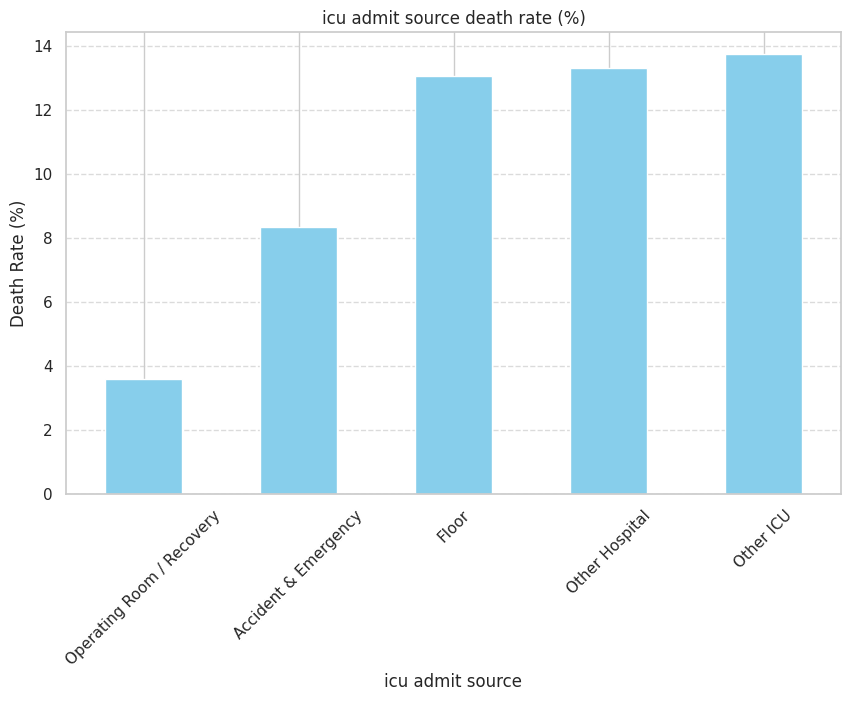

In [266]:
icu_admit_source_death_rate.sort_values().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('icu admit source death rate (%)')
plt.ylabel('Death Rate (%)')
plt.xlabel('icu admit source')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Görüleceği üzere bazı dengesiz dağılımlar var bu yüzden orantılı bir dağılım ile eksik veri doldurma gerçekleştireceğiz

In [267]:
# ICU admit source ölüm oranları
icu_admit_source_death_rate = {
    'Accident & Emergency': 8.356525,
    'Floor': 13.052673,
    'Operating Room / Recovery': 3.599340,
    'Other Hospital': 13.301141,
    'Other ICU': 13.739546
}

# ICU admit source kategorilerinin ölüm oranlarını normalize etme
total_death_rate = sum(icu_admit_source_death_rate.values())
death_rate_probabilities = {key: value / total_death_rate for key, value in icu_admit_source_death_rate.items()}

# Eksik değerlerin sayısını bulma
missing_icu_admit_source_count = df['icu_admit_source'].isnull().sum()

# Eksik değerleri orantılı şekilde doldurma (ölüm oranına göre)
fill_values = np.random.choice(
    list(death_rate_probabilities.keys()),
    size=missing_icu_admit_source_count,
    p=list(death_rate_probabilities.values())
)

# Eksik değerleri doldur
df.loc[df['icu_admit_source'].isnull(), 'icu_admit_source'] = fill_values

In [268]:
# icu_stay_type	
	
print(df['icu_stay_type'].value_counts())

icu_stay_type
admit       83667
transfer     4850
readmit       542
Name: count, dtype: int64


In [269]:
icu_stay_type_death_rate = df.groupby('icu_stay_type')['hospital_death'].mean() * 100

# Yüzdelik oranlar

print(icu_stay_type_death_rate)

icu_stay_type
admit        8.266103
readmit      9.040590
transfer    10.309278
Name: hospital_death, dtype: float64


/tmp/ipykernel_30/125032008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icu_stay_type_death_rate = df.groupby('icu_stay_type')['hospital_death'].mean() * 100


admit çok fazla bariz bir şekilde bu sebeple direkt eksikleri tepe değer ile dolduralım

In [270]:
mode = df['icu_stay_type'].mode()[0]  

df['icu_stay_type'].fillna(mode, inplace=True)

/tmp/ipykernel_30/3518311188.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['icu_stay_type'].fillna(mode, inplace=True)


In [271]:
# icu_type

print(df['icu_type'].value_counts())

icu_type
Med-Surg ICU    49064
MICU             7472
Neuro ICU        7449
CCU-CTICU        6946
SICU             5064
Cardiac ICU      4634
CSICU            4468
CTICU            3899
Name: count, dtype: int64


In [272]:
icu_type_death_rate = df.groupby('icu_type')['hospital_death'].mean() * 100

# Yüzdelik oranlar

print(icu_type_death_rate)

icu_type
CCU-CTICU        7.299165
CSICU            5.416294
CTICU            5.898948
Cardiac ICU     10.099266
MICU            11.683619
Med-Surg ICU     8.462416
Neuro ICU        8.108471
SICU             7.227488
Name: hospital_death, dtype: float64


/tmp/ipykernel_30/1237899499.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icu_type_death_rate = df.groupby('icu_type')['hospital_death'].mean() * 100


In [273]:
mode = df['icu_type'].mode()[0]  

df['icu_type'].fillna(mode, inplace=True)

/tmp/ipykernel_30/1196976625.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['icu_type'].fillna(mode, inplace=True)


In [274]:
# apache_3j_bodysystem

print(df['apache_3j_bodysystem'].value_counts())

apache_3j_bodysystem
Cardiovascular          29136
Neurological            11548
Sepsis                  11365
Respiratory             11240
Gastrointestinal         8736
Metabolic                7415
Trauma                   3743
Genitourinary            2107
Musculoskeletal/Skin     1127
Hematological             614
Gynecological             304
Name: count, dtype: int64


In [275]:
apache_3j_bodysystem_death_rate = df.groupby('apache_3j_bodysystem')['hospital_death'].mean() * 100

# Yüzdelik oranlar

print(apache_3j_bodysystem_death_rate)

apache_3j_bodysystem
Cardiovascular           7.742998
Gastrointestinal         7.188645
Genitourinary            6.169910
Gynecological            0.657895
Hematological            8.957655
Metabolic                1.469993
Musculoskeletal/Skin     4.525288
Neurological             7.715622
Respiratory             11.023132
Sepsis                  15.274967
Trauma                   6.358536
Name: hospital_death, dtype: float64


/tmp/ipykernel_30/2617193643.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  apache_3j_bodysystem_death_rate = df.groupby('apache_3j_bodysystem')['hospital_death'].mean() * 100


Dengesiz dağılımlar var orantılı doldurma işlemi gerçekleştirelim

In [276]:
# Apache 3j bodysystem ölüm oranları
apache_3j_bodysystem_death_rate = {
    'Cardiovascular': 7.742998,
    'Gastrointestinal': 7.188645,
    'Genitourinary': 6.169910,
    'Gynecological': 0.657895,
    'Hematological': 8.957655,
    'Metabolic': 1.469993,
    'Musculoskeletal/Skin': 4.525288,
    'Neurological': 7.715622,
    'Respiratory': 11.023132,
    'Sepsis': 15.274967,
    'Trauma': 6.358536
}

# Ölüm oranlarını normalize et (toplam = 1)
total_death_rate = sum(apache_3j_bodysystem_death_rate.values())
death_rate_probabilities = {key: value / total_death_rate for key, value in apache_3j_bodysystem_death_rate.items()}

# Eksik değerlerin sayısını bul
missing_apache_3j_bodysystem_count = df['apache_3j_bodysystem'].isnull().sum()

# Eksik değerleri orantılı şekilde doldur (ölüm oranına göre)
fill_values = np.random.choice(
    list(death_rate_probabilities.keys()),
    size=missing_apache_3j_bodysystem_count,
    p=list(death_rate_probabilities.values())
)

# Eksik değerleri doldur
df.loc[df['apache_3j_bodysystem'].isnull(), 'apache_3j_bodysystem'] = fill_values

In [277]:
# apache_2_bodysystem

print(df['apache_2_bodysystem'].value_counts())

apache_2_bodysystem
Cardiovascular         37663
Neurologic             11532
Respiratory            11232
Gastrointestinal        8767
Metabolic               7411
Trauma                  3712
Undefined diagnoses     3665
Renal/Genitourinary     2381
Haematologic             621
Undefined Diagnoses      338
Name: count, dtype: int64


In [278]:
apache_2_bodysystem_death_rate = df.groupby('apache_2_bodysystem')['hospital_death'].mean() * 100

# Yüzdelik oranlar

print(apache_2_bodysystem_death_rate)

apache_2_bodysystem
Cardiovascular         10.495712
Gastrointestinal        7.140413
Haematologic            9.178744
Metabolic               1.443800
Neurologic              7.708984
Renal/Genitourinary     5.375892
Respiratory            10.968661
Trauma                  6.438578
Undefined Diagnoses     5.029586
Undefined diagnoses     1.909959
Name: hospital_death, dtype: float64


/tmp/ipykernel_30/2552216935.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  apache_2_bodysystem_death_rate = df.groupby('apache_2_bodysystem')['hospital_death'].mean() * 100


Ölüm oranlarına dayalı orantılı doldurma yöntemini kullanmak yine en uygun yaklaşım olacaktır

In [279]:
# Apache 2 bodysystem ölüm oranları
apache_2_bodysystem_death_rate = {
    'Cardiovascular': 10.495712,
    'Gastrointestinal': 7.140413,
    'Haematologic': 9.178744,
    'Metabolic': 1.443800,
    'Neurologic': 7.708984,
    'Renal/Genitourinary': 5.375892,
    'Respiratory': 10.968661,
    'Trauma': 6.438578,
    'Undefined Diagnoses': 5.029586,
    'Undefined diagnoses': 1.909959
}

# Ölüm oranlarını normalize et (toplam = 1)
total_death_rate = sum(apache_2_bodysystem_death_rate.values())
death_rate_probabilities = {key: value / total_death_rate for key, value in apache_2_bodysystem_death_rate.items()}

# Eksik değerlerin sayısını bul
missing_apache_2_bodysystem_count = df['apache_2_bodysystem'].isnull().sum()

# Eksik değerleri orantılı şekilde doldur (ölüm oranına göre)
fill_values = np.random.choice(
    list(death_rate_probabilities.keys()),
    size=missing_apache_2_bodysystem_count,
    p=list(death_rate_probabilities.values())
)

# Eksik değerleri doldur
df.loc[df['apache_2_bodysystem'].isnull(), 'apache_2_bodysystem'] = fill_values

Kategorik değişkenler için eksik veri kontrolü yapalım 

In [280]:
# Kategorik değişkenleri gözden geçirelim

categorical_columns = df.select_dtypes(include=['category']).columns

missing_data_summary_categorical = pd.DataFrame({
    'Sütun Adı': categorical_columns,
    'Eksik Veri Sayısı': df[categorical_columns].isna().sum(),
    'Eksik Olmayan Veri Sayısı': df[categorical_columns].notna().sum(),
    'Eksiklik Yüzdesi (%)': (df[categorical_columns].isna().sum() / df.shape[0]) * 100
}).reset_index(drop=True)

missing_data_summary_categorical

,Sütun Adı,Eksik Veri Sayısı,Eksik Olmayan Veri Sayısı,Eksiklik Yüzdesi (%)
0,ethnicity,0,91713,0.0
1,gender,0,91713,0.0
2,icu_admit_source,0,91713,0.0
3,icu_stay_type,0,91713,0.0
4,icu_type,0,91713,0.0
5,apache_3j_bodysystem,0,91713,0.0
6,apache_2_bodysystem,0,91713,0.0


# Kategorik Değişkenlerin Analizi

Kategorik değişkenler, sınırlı sayıda farklı değeri olan ve bu değerlerin kategorilere ayrıldığı veri türleridir. Bu tür değişkenler genellikle belirli bir sınıfı, grubu veya kategoriyi temsil eder. Örneğin, cinsiyet, etnik köken, eğitim seviyesi gibi değişkenler kategorik değişkenlerdir.

#### 1. Kategorik Değişkenlerin Analiz Yöntemleri

Kategorik değişkenlerin analizinde, verinin dağılımını anlamak ve kategoriler arasındaki ilişkileri keşfetmek için çeşitli yöntemler kullanılır:

- **Frekans Dağılımı**: Kategorik değişkenlerin analizine genellikle frekans dağılımı ile başlanır. Bu, her kategori için kaç gözlem olduğunu gösterir. Örneğin, cinsiyet gibi bir değişkenin erkek ve kadın sayılarını inceleyebilirsiniz.

- **Yüzdelik Dağılım**: Kategorik değişkenlerin yüzdelik dağılımını incelemek, her kategorinin veri setindeki toplam içindeki oranını anlamamıza yardımcı olur. Bu, kategorilerin dağılımının ne kadar eşit olduğunu gösterir.

- **Çapraz Tablo (Crosstab)**: İki kategorik değişken arasındaki ilişkiyi görmek için çapraz tablo kullanılır. Bu tablo, her bir kategori için karşılık gelen diğer kategorilerle birlikte gözlemler sağlar. Örneğin, cinsiyet ve eğitim seviyesi arasındaki ilişkiyi incelemek için çapraz tablo oluşturulabilir.

#### 2. Kategorik Değişkenlerin Görselleştirilmesi

Kategorik değişkenlerin görselleştirilmesi, verinin daha kolay anlaşılmasını sağlar:

- **Çubuk Grafikler**: Her kategorinin frekansını veya yüzdesini görsel olarak göstermek için kullanılır. Çubuk grafikler, kategorilerin sıklıklarını karşılaştırmanın etkili bir yoludur.

- **Pasta Grafikler**: Kategorilerin toplam içindeki oranlarını görselleştirmek için kullanılır. Pasta grafikleri, özellikle kategoriler arası oranları gösterirken yararlı olabilir.

#### 3. Kategorik Değişkenlerin İlişkilerinin İncelenmesi

İki kategorik değişken arasındaki ilişkiyi incelemek için **Ki-Kare Testi (Chi-Square Test)** sıklıkla kullanılır. Bu test, iki kategorik değişkenin bağımsız olup olmadığını anlamaya yardımcı olur. Eğer p-değeri 0.05'ten küçükse, iki değişken arasında anlamlı bir ilişki olduğu kabul edilir.

#### 4. Sonuç

Kategorik değişkenlerin analizi, veri setindeki önemli ilişkileri ve desenleri ortaya çıkarır. Frekans ve yüzdelik dağılımlar, ilişkilerin belirlenmesi ve görselleştirme, verinin daha anlaşılır hale gelmesine yardımcı olur. Bu analizler, veriden anlamlı ve güvenilir sonuçlar çıkarmak için temel adımlardır.r çıkarmak için temel adımlardır.
için temel adımlardır.

In [281]:
# select_dtypes() ile category tipindeki verileri gözlemleyelim
# object olan bütün değişkenleri category'e  çevirdiğimizi unutmayalım !

df_kategorik = df.select_dtypes("category")

df_kategorik.head(10)

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,admit,CTICU,Genitourinary,Cardiovascular
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
5,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,Neurologic
6,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory
7,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Sepsis,Cardiovascular
8,Caucasian,M,Other Hospital,admit,CCU-CTICU,Cardiovascular,Cardiovascular
9,Caucasian,M,Accident & Emergency,admit,CCU-CTICU,Cardiovascular,Cardiovascular


Kategorik değişkenler için eşsiz değerlerin sayısını görelim

In [282]:
for i in df_kategorik.columns:
    print(i,"değişkeni için",df_kategorik[i].nunique(),"tane eşsiz değer var.")
    print("-"*50)

ethnicity değişkeni için 6 tane eşsiz değer var.
--------------------------------------------------
gender değişkeni için 2 tane eşsiz değer var.
--------------------------------------------------
icu_admit_source değişkeni için 5 tane eşsiz değer var.
--------------------------------------------------
icu_stay_type değişkeni için 3 tane eşsiz değer var.
--------------------------------------------------
icu_type değişkeni için 8 tane eşsiz değer var.
--------------------------------------------------
apache_3j_bodysystem değişkeni için 11 tane eşsiz değer var.
--------------------------------------------------
apache_2_bodysystem değişkeni için 10 tane eşsiz değer var.
--------------------------------------------------


Her bir kategorik değişken için toplam gözlem sayısını görelim

In [283]:
# value_count() metodunu kullancağız

for i in df_kategorik.columns:
    print(df_kategorik[i].value_counts())
    print("*"*50)

ethnicity
Caucasian           72642
African American     9267
Other/Unknown        4250
Hispanic             3682
Asian                1101
Native American       771
Name: count, dtype: int64
**************************************************
gender
M    49475
F    42238
Name: count, dtype: int64
**************************************************
icu_admit_source
Accident & Emergency         52927
Operating Room / Recovery    18377
Floor                        15854
Other Hospital                2986
Other ICU                     1569
Name: count, dtype: int64
**************************************************
icu_stay_type
admit       86321
transfer     4850
readmit       542
Name: count, dtype: int64
**************************************************
icu_type
Med-Surg ICU    51781
MICU             7472
Neuro ICU        7449
CCU-CTICU        6946
SICU             5064
Cardiac ICU      4634
CSICU            4468
CTICU            3899
Name: count, dtype: int64
**************************

# Kategorik Değişkenler için Görselleştirme İşlemleri

Kategorik değişkenler için yatay çubuk grafiği (horizontal bar plot) ile görselleştirme yapalım

<Axes: ylabel='ethnicity'>

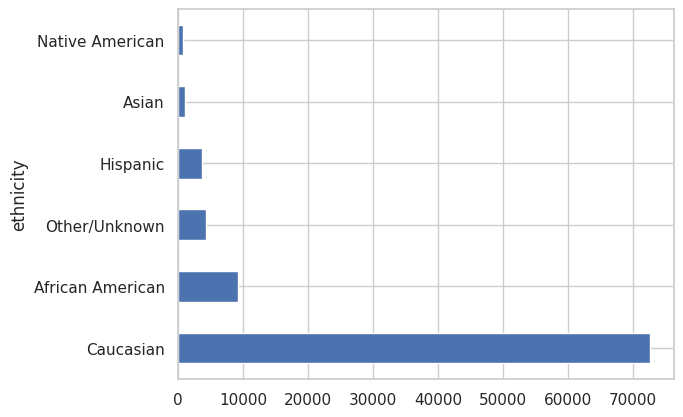

In [284]:
# bunun için plot.barh() metodu kullanılır

df["ethnicity"].value_counts().plot.barh()

Caucasian grubunun veri setinde çok baskın olması, toplumu homojen bir şekilde temsil etmediğini gösterebilir. Bu durum, hastanenin bulunduğu bölgedeki çoğunluk nüfus yapısından veya veri toplama sürecindeki sınıflandırma hatalarından kaynaklanıyor olabilir. Özellikle "Other/Unknown" kategorisinin büyüklüğü, bazı etnik grupların doğru sınıflandırılamadığını veya eksik beyan edildiğini düşündürmektedir. Ayrıca, Caucasian grubundaki yüksek oranın ölüm oranlarını da etkileyebileceği göz önüne alınarak, bu gruba özgü sağlık durumları veya risk faktörleri daha detaylı incelenmelidir. Bu durum, aynı zamanda hastane hizmetlerinin bölgesel demografik dağılımını yansıtıyor olabilir.

<Axes: ylabel='gender'>

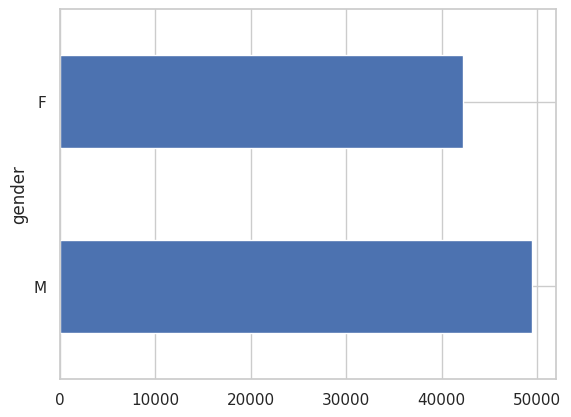

In [285]:
df["gender"].value_counts().plot.barh()

Cinsiyet dağılımındaki küçük fark, hastanenin demografik yapısıyla uyumlu olabilir ve analizlerin genelleştirilebilirliği açısından büyük bir sorun teşkil etmeyebilir. Ancak, bu farkın altında yatan sağlık hizmetine erişim eşitsizlikleri veya belirli risk faktörleri gibi nedenler daha derinlemesine incelenmelidir.

<Axes: ylabel='icu_admit_source'>

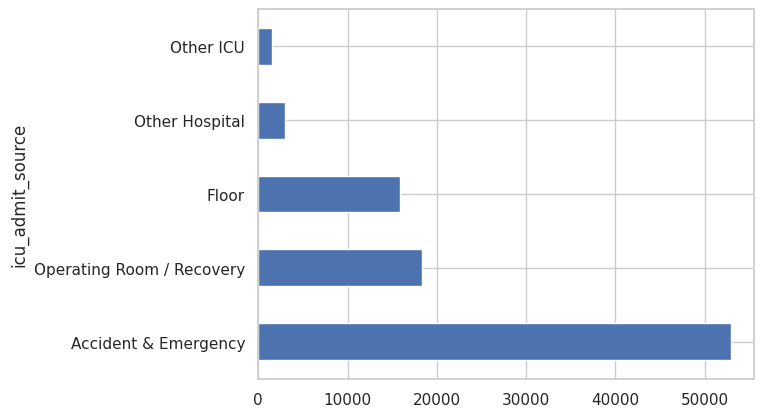

In [286]:
df["icu_admit_source"].value_counts().plot.barh()

ICU Admit Source (Yoğun Bakım Kabul Kaynağı) dağılımı, hastaların yoğun bakıma hangi kaynaktan geldiğini göstermekte ve "Accident & Emergency" kategorisinin açık ara en fazla sayıya sahip olduğu görülmektedir.

"Operating Room / Recovery" kategorisinin ikinci sırada yer alması, ameliyat sonrası hastaların yoğun bakıma sıklıkla ihtiyaç duyduğunu gösterir.

"Floor" kategorisi, hastaların hastane içindeki diğer bölümlerden yoğun bakıma taşındığını gösterir. Bu, yataklı servislerde başlayan tedavilerin yoğun bakım ihtiyacına dönüşebileceğini işaret eder.

"Other Hospital" kategorisinin varlığı, yoğun bakım ihtiyacı olan hastaların sevk edildiğini gösterir. Bu durum, bölgedeki hastaneler arasındaki iş birliği ve koordinasyonun bir göstergesidir.Aynı zamanda bazı hastanelerde tıbbi yetersizlik olabileceğine de işaret edebilir.

<Axes: ylabel='icu_stay_type'>

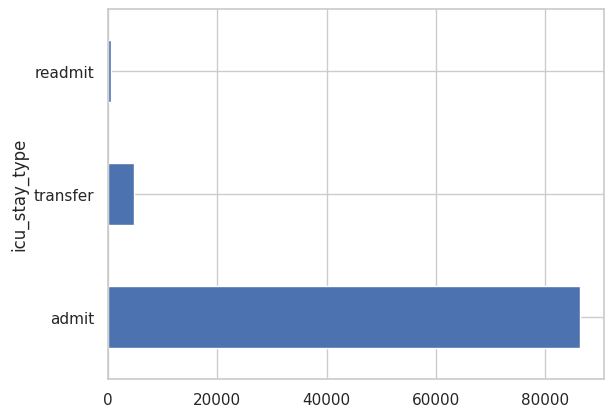

In [287]:
df["icu_stay_type"].value_counts().plot.barh()

ICU Stay Type (Yoğun Bakım Kalış Türü) dağılımı, hastaların yoğun bakımda kalış şekillerini göstermektedir.

"Admit" kategorisinin açık ara en yüksek değeri taşıması, yoğun bakıma alınan hastaların büyük çoğunluğunun ilk kez kabul edildiğini gösteriyor. Bu, hastanenin yoğun bakım ünitesine başvurulan hastaların büyük kısmının ilk defa kabul edilen ve acil müdahale gerektiren hastalar olduğuna işaret eder.

"Transfer" kategorisi, başka bir hastaneden bu hastaneye sevk edilen hastaların sayısını gösterir. Bu, başka hastanelerde yeterli yoğun bakım kapasitesi olmayabilir ya da hastaların özel tedavi gereksinimleri nedeniyle başka bir hastaneye sevk edilmesi gerekebilir.

"Readmit" kategorisi, yoğun bakımda daha önce tedavi görmüş bir hastanın tekrar yoğun bakıma alındığını gösterir. Bu, hastaların tedavi sürecindeki komplikasyonlar veya iyileşme sürecindeki aksamalar nedeniyle yoğun bakıma yeniden ihtiyaç duyduğunu gösterebilir.Ancak bu durum nadir görülmektedir.

<Axes: ylabel='icu_type'>

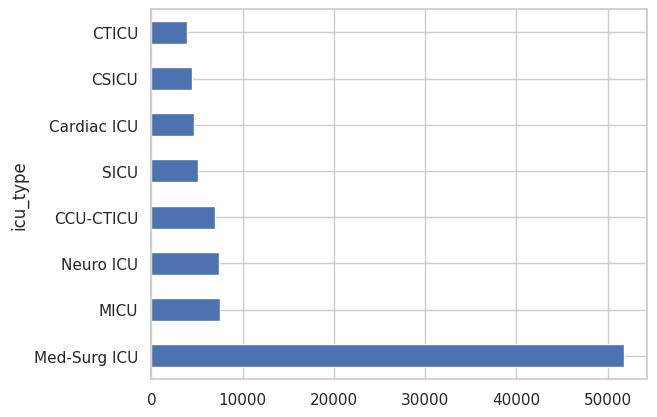

In [288]:
df["icu_type"].value_counts().plot.barh()

ICU Type (Yoğun Bakım Türü) dağılımı, hastaların yoğun bakım ünitesinde hangi tür bakım aldıklarını göstermektedir. "Med-Surg ICU" kategorisinin açık ara en fazla sayıya sahip olduğu, diğer kategorilerin ise daha az oranda yer aldığı görülmektedir.

Med-Surg ICU (Medical-Surgical Intensive Care Unit) terimi, Tıbbi-Cerrahi Yoğun Bakım Ünitesi anlamına gelir. Bu birim, hem tıbbi hem de cerrahi hastalıkları olan hastalar için yoğun bakım hizmeti sunan bir yoğun bakım türüdür.

<Axes: ylabel='apache_3j_bodysystem'>

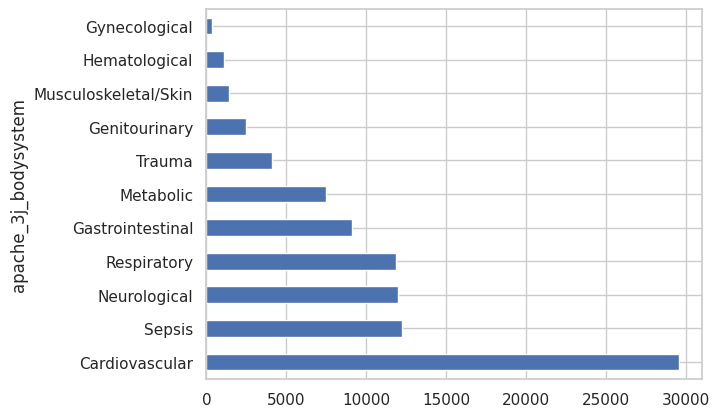

In [289]:
df["apache_3j_bodysystem"].value_counts().plot.barh()

Apache_3J Bodysystem dağılımı, hastaların yoğun bakımda tedavi aldıkları ana vücut sistemlerine göre kategorize edilmiştir. Bu dağılım, farklı organ sistemlerinde yaşanan sağlık sorunlarına göre yoğun bakım hizmetlerinin nasıl dağıldığını ve hangi organ sistemlerinin daha fazla etkilenmiş olduğunu gösterir.

"Cardiovascular" kategorisinin yüksek sayıda hastayı kapsaması, kardiyovasküler (kalp ve damar hastalıkları) sağlık sorunlarının yoğun bakımda en fazla görülen hastalık grubu olduğunu gösterir. Kalp krizi, kalp yetmezliği, kardiyopulmoner arrest gibi durumlar bu kategoriye girer ve bu tür hastalar yoğun bakımda sıkça tedavi edilir.

Sepsis: Vücudun sistemik enfeksiyon yanıtı olarak gelişen, hayati tehlike oluşturan durum.

Neurological (Nörolojik): Beyin, omurilik veya sinir sistemi hastalıkları (örneğin inme, nörolojik travma) nedeniyle yoğun bakımda tedavi gerektiren hastalar.

Respiratory (Solunum): Solunum yetmezliği veya solunum yolu enfeksiyonları nedeniyle yoğun bakımda tedavi gerektiren hastalar.

Gastrointestinal (Gastrointestinal): Sindirim sistemi hastalıkları (karaciğer yetmezliği, pankreatit gibi) nedeniyle yoğun bakım gerektiren hastalar.

Metabolic (Metabolik): Metabolik bozukluklar (diyabetik koma, elektrolit dengesizlikleri) nedeniyle yoğun bakımda tedavi gerektiren hastalar.

Trauma (Travma): Fiziksel yaralanmalar (kaza, yaralanmalar) nedeniyle yoğun bakım gerektiren hastalar.
Genitourinary (Genitoüriner): Böbrek ve idrar yolu hastalıkları nedeniyle yoğun bakımda tedavi gerektiren hastalar.

Musculoskeletal/Skin (Kas-İskelet/Cilt): Kas-iskelet sistemi hastalıkları ve cilt sorunları (yanıklar, kırıklar) nedeniyle yoğun bakım gerektiren hastalar.

Hematological (Hematolojik): Kan hastalıkları (kanser, anemi gibi) nedeniyle yoğun bakım gerektiren hastalar.

Gynecological (Jinekolojik): Kadın hastalıkları ve doğum sonrası komplikasyonlar nedeniyle yoğun bakım gerektiren hastalar.

Verilen dağılım, yoğun bakımda tedavi edilen hastaların çoğunun kardiyovasküler, sepsis, nörolojik ve solunum hastalıklarından kaynaklanan sağlık sorunları nedeniyle yoğun bakımda tedavi alıyor. Bu gruplar, hastaların tedavi süreçlerinde daha fazla kaynak ve uzmanlık gerektiren alanlardır.

<Axes: ylabel='apache_2_bodysystem'>

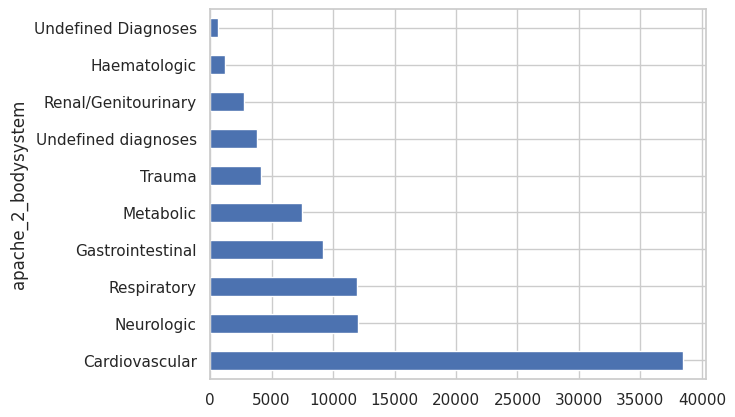

In [290]:
df["apache_2_bodysystem"].value_counts().plot.barh()

Apache 2 Body System (APACHE II Vücut Sistemi) dağılımı, hastaların yoğun bakımda tedavi edilen organ sistemlerine göre sınıflandırılmasını gösterir. Her bir kategori, ilgili organ sistemindeki sağlık sorunlarını ifade eder.

Bu dağılım, hastaların yoğun bakımda tedavi edilen organ sistemlerine göre belirli kategorilere ayrıldığını ve her bir sistemin yoğun bakımda farklı gereksinimlere sahip olduğunu gösteriyor. Kardiyovasküler hastalıkların en büyük paya sahip olduğu görülürken, nörolojik ve solunum sorunları da yoğun bakım kaynaklarının önemli bir kısmını kapsıyor. Sindirim, metabolik ve travma gibi diğer hastalık gruplarının da yoğun bakımda tedavi edilmesi gereken hastalar oluşturduğunu gözlemleyebiliriz. Hematolojik hastalıklar ve belirsiz tanılar ise daha az sıklıkla yoğun bakım gereksinimi doğuruyor. 

# Kategorik Gruplama İşlemleri

Kategorik gruplama, verilerin belirli kategorilere veya gruplara ayrılarak, her grubun özelliklerinin analiz edilmesi işlemidir. Bu, özellikle kategorik değişkenlerin (örneğin, cinsiyet, etnik köken, hastalık türü gibi) farklı değerler üzerinden analiz edilmesi için kullanılır. Kategorik gruplama, veri analizi, özetleme, karşılaştırma ve görselleştirme gibi işlemler için oldukça faydalıdır.

In [291]:
# Etnik kökenler ve ICU Admit Source (Yoğun Bakım Kabul Kaynağı) dağılımını görelim
# groupby() metodunu kullancağız

df_ethnicity_icu = df.groupby(by="ethnicity")["icu_admit_source"].value_counts().unstack(fill_value=0)

df_ethnicity_icu

/tmp/ipykernel_30/3767843038.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ethnicity_icu = df.groupby(by="ethnicity")["icu_admit_source"].value_counts().unstack(fill_value=0)


icu_admit_source,Accident & Emergency,Floor,Operating Room / Recovery,Other Hospital,Other ICU
ethnicity,,,,,
African American,5697,1742,1414,271,143
Asian,637,180,224,33,27
Caucasian,41474,12373,15132,2392,1271
Hispanic,2078,781,663,96,64
Native American,505,111,108,36,11
Other/Unknown,2536,667,836,158,53


In [292]:
# Cinsiyet ve ICU Kabul Kaynağı (icu_admit_source) arasındaki ilişkiyi görelim

df_gender_icu = df.groupby(by="gender")["icu_admit_source"].value_counts().unstack(fill_value=0)

df_gender_icu

/tmp/ipykernel_30/2286162608.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gender_icu = df.groupby(by="gender")["icu_admit_source"].value_counts().unstack(fill_value=0)


icu_admit_source,Accident & Emergency,Floor,Operating Room / Recovery,Other Hospital,Other ICU
gender,,,,,
F,24612,7626,7928,1340,732
M,28315,8228,10449,1646,837


In [293]:
# Etnik Gruplara Göre ICU Tipi Dağılımı

df_ethnicity_icu_type = df.groupby(by="ethnicity")["icu_type"].value_counts().unstack(fill_value=0)

df_ethnicity_icu_type

/tmp/ipykernel_30/2358486035.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ethnicity_icu_type = df.groupby(by="ethnicity")["icu_type"].value_counts().unstack(fill_value=0)


icu_type,CCU-CTICU,CSICU,CTICU,Cardiac ICU,MICU,Med-Surg ICU,Neuro ICU,SICU
ethnicity,,,,,,,,
African American,613,197,634,768,887,4738,741,689
Asian,48,43,87,26,74,679,92,52
Caucasian,5988,3870,2661,3408,6072,40687,5936,4020
Hispanic,108,79,304,298,120,2359,340,74
Native American,5,54,10,5,19,614,52,12
Other/Unknown,184,225,203,129,300,2704,288,217


In [294]:
# ICU Yatış Türleri (icu_stay_type) ve Apache 2 Beden Sistemi (apache_2_bodysystem)

df_icu_stay_bodysystem = df.groupby(by="icu_stay_type")["apache_2_bodysystem"].value_counts().unstack(fill_value=0)
df_icu_stay_bodysystem

/tmp/ipykernel_30/3916974984.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_icu_stay_bodysystem = df.groupby(by="icu_stay_type")["apache_2_bodysystem"].value_counts().unstack(fill_value=0)


apache_2_bodysystem,Cardiovascular,Gastrointestinal,Haematologic,Metabolic,Neurologic,Renal/Genitourinary,Respiratory,Trauma,Undefined Diagnoses,Undefined diagnoses
icu_stay_type,,,,,,,,,,
admit,36389,8643,1139,6995,11299,2584,11193,3846,626,3607
readmit,206,48,10,18,88,22,81,18,4,47
transfer,1832,517,91,488,635,136,703,274,47,127


In [295]:
# Yaş ve Etnik Köken İlişkisi

df_age_ethnicity = df.groupby(by="ethnicity")["age"].describe()

df_age_ethnicity

/tmp/ipykernel_30/134491086.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age_ethnicity = df.groupby(by="ethnicity")["age"].describe()


,count,mean,std,min,25%,50%,75%,max
ethnicity,,,,,,,,
African American,9267.0,56.891119,16.201732,16.0,47.0,59.0,67.0,89.0
Asian,1101.0,61.271571,17.106612,17.0,51.0,65.0,74.0,89.0
Caucasian,72642.0,63.625616,15.705893,16.0,55.0,65.0,75.0,89.0
Hispanic,3682.0,61.828354,17.639894,16.0,51.0,65.0,76.0,89.0
Native American,771.0,52.333333,17.113120,16.0,40.0,53.0,65.0,88.0
Other/Unknown,4250.0,58.423294,17.635849,16.0,47.0,62.0,71.0,89.0


In [296]:
# ICU Türü ve Yatış Kaynağı İlişkisi

df_icu_type_admit_source = df.groupby(by="icu_type")["icu_admit_source"].value_counts().unstack(fill_value=0)

df_icu_type_admit_source

/tmp/ipykernel_30/3981679037.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_icu_type_admit_source = df.groupby(by="icu_type")["icu_admit_source"].value_counts().unstack(fill_value=0)


icu_admit_source,Accident & Emergency,Floor,Operating Room / Recovery,Other Hospital,Other ICU
icu_type,,,,,
CCU-CTICU,3817,1164,1487,361,117
CSICU,1536,551,2194,120,67
CTICU,904,427,2301,194,73
Cardiac ICU,2949,959,481,156,89
MICU,5046,1536,452,279,159
Med-Surg ICU,32111,9737,7927,1201,805
Neuro ICU,4565,771,1518,413,182
SICU,1999,709,2017,262,77


In [297]:
# ICU Yatış Türüne Göre Etnik Köken Dağılım

df_stay_type_ethnicity = df.groupby(by="icu_stay_type")["ethnicity"].value_counts().unstack(fill_value=0)

df_stay_type_ethnicity

/tmp/ipykernel_30/2809161851.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stay_type_ethnicity = df.groupby(by="icu_stay_type")["ethnicity"].value_counts().unstack(fill_value=0)


ethnicity,African American,Asian,Caucasian,Hispanic,Native American,Other/Unknown
icu_stay_type,,,,,,
admit,8788,1063,68114,3521,726,4109
readmit,39,4,408,68,6,17
transfer,440,34,4120,93,39,124


In [298]:
# Etnik Kökenlere Göre Kardiyovasküler Hastalık Dağılımı

df_ethnicity_cardiovascular = df[df["apache_3j_bodysystem"] == "Cardiovascular"].groupby("ethnicity").size()

df_ethnicity_cardiovascular

/tmp/ipykernel_30/3854695021.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ethnicity_cardiovascular = df[df["apache_3j_bodysystem"] == "Cardiovascular"].groupby("ethnicity").size()


ethnicity
African American     2906
Asian                 331
Caucasian           23740
Hispanic             1129
Native American       130
Other/Unknown        1338
dtype: int64

In [299]:
# ICU Türüne Göre Hastalık Dağılımı

df_icu_type_bodysystem = df.groupby(by="icu_type")["apache_2_bodysystem"].value_counts().unstack(fill_value=0)

df_icu_type_bodysystem

/tmp/ipykernel_30/4025651675.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_icu_type_bodysystem = df.groupby(by="icu_type")["apache_2_bodysystem"].value_counts().unstack(fill_value=0)


apache_2_bodysystem,Cardiovascular,Gastrointestinal,Haematologic,Metabolic,Neurologic,Renal/Genitourinary,Respiratory,Trauma,Undefined Diagnoses,Undefined diagnoses
icu_type,,,,,,,,,,
CCU-CTICU,4671,301,85,282,220,105,663,70,40,509
CSICU,2806,176,31,167,76,63,502,58,21,568
CTICU,2403,149,29,52,132,47,275,25,20,767
Cardiac ICU,2723,348,72,303,275,106,583,104,29,91
MICU,3091,894,118,818,613,241,1478,126,55,38
Med-Surg ICU,20334,6203,756,5444,5672,1929,7478,2223,419,1323
Neuro ICU,790,211,82,228,4513,78,359,1088,50,50
SICU,1609,926,67,207,521,173,639,444,43,435


In [300]:
# Cinsiyet ve Beden Sistemi Sağlık Durumu

df_gender_bodysystem = df.groupby(by="gender")["apache_3j_bodysystem"].value_counts().unstack(fill_value=0)

df_gender_bodysystem

/tmp/ipykernel_30/3974369430.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gender_bodysystem = df.groupby(by="gender")["apache_3j_bodysystem"].value_counts().unstack(fill_value=0)


apache_3j_bodysystem,Cardiovascular,Gastrointestinal,Genitourinary,Gynecological,Hematological,Metabolic,Musculoskeletal/Skin,Neurological,Respiratory,Sepsis,Trauma
gender,,,,,,,,,,,
F,12059,4249,1245,318,568,3764,682,5908,5896,5987,1562
M,17515,4875,1238,21,539,3737,711,6088,5973,6251,2527


# Sürekli Değişkenlerin Analizi  

Sürekli değişkenler, belirli bir aralıkta herhangi bir değer alabilen ve genellikle ölçümle ifade edilen değişkenlerdir. Örneğin, ağırlık, boy, zaman ve sıcaklık gibi değişkenler sürekli değişkenlere örnektir. Sürekli değişkenlerin analizi, genellikle istatistiksel yöntemlerle gerçekleştirilir ve verilerin özelliklerini anlamaya, modellemeye veya tahmin etmeye odaklanır.  

## Sürekli Değişkenlerin Temel Özellikleri  
1. **Aralıksız Değerler:** Sürekli değişkenler, belirli bir aralık içinde sonsuz sayıda değere sahip olabilir.  
2. **Ölçüm Düzeyi:** Bu değişkenler genellikle oran ya da aralık ölçeğinde ölçülür.  
3. **Doğal Sıralama:** Sürekli değişkenlerde ölçülen değerler arasında doğal bir sıralama bulunur.  

## Analiz Yöntemleri  

### 1. **Tanımlayıcı İstatistikler**  
Sürekli değişkenlerin genel özelliklerini özetlemek için kullanılan yöntemlerdir:  
- **Merkezi Eğilim Ölçüleri:**  
  - Ortalama (\(\mu\)): Verilerin toplamının, gözlem sayısına bölünmesiyle hesaplanır.  
  - Ortanca (Medyan): Verilerin sıralandıktan sonra ortada kalan değeridir.  
  - Mod: En sık gözlenen değer.  
- **Dağılım Ölçüleri:**  
  - Varyans (\(\sigma^2\)): Verilerin ortalamadan sapmalarının karesinin ortalaması.  
  - Standart Sapma (\(\sigma\)): Varyansın karekökü.  
  - Çeyrekler Arası Mesafe (IQR): Verilerin %25 ve %75’lik yüzdelikleri arasındaki fark.  

### 2. **Grafiksel Yöntemler**  
Sürekli değişkenlerin dağılımını görselleştirmek için kullanılır:  
- **Histogram:** Verilerin frekanslarını görselleştiren bir çubuk grafik.  
- **Kutu Grafiği (Boxplot):** Verilerin medyan, çeyrekler arası mesafe ve aykırı değerlerini gösterir.  
- **Yoğunluk Grafiği:** Verilerin dağılımını sürekli bir eğri olarak ifade eder.  

### 3. **Olasılık Dağılımları**  
Sürekli değişkenler için teorik dağılımlar kullanılarak analiz yapılır:  
- **Normal Dağılım:** Ortalama etrafında simetrik bir dağılım.  
- **Uniform Dağılım:** Tüm değerlerin eşit olasılıkla meydana geldiği dağılım.  
- **Exponential Dağılım:** Belirli olayların beklenen sürelerini modellemek için kullanılır.  

### 4. **Hipotez Testleri**  
Sürekli değişkenler üzerinde belirli iddiaları test etmek için kullanılan yöntemlerdir:  
- **t-Testi:** İki grubun ortalamalarını karşılaştırır.  
- **ANOVA (Varyans Analizi):** Birden fazla grubun ortalamalarını karşılaştırır.  
- **Korelasyon ve Regresyon Analizi:** İki veya daha fazla sürekli değişken arasındaki ilişkileri inceler.  

### 5. **Regresyon Analizi**  
Bağımlı ve bağımsız sürekli değişkenler arasındaki ilişkiyi modellemek için kullanılır:  
- **Doğrusal Regresyon:** İki değişken arasındaki doğrusal ilişkiyi ifade eder.  
- **Lojistik Regresyapılabilir ve verilerden anlamlı sonuçlar elde edilebilir.

In [301]:
# select_dtypes() ile numeric tipindeki verileri gözlemleyelim
# Sürekli değişkenler genellikle float veya int tipindedir

df_surekli = df.select_dtypes(include=["float", "int"])

# İlk 10 gözlemi inceleyelim
df_surekli.head(10)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,66154.0,25312.0,118.0,68.0,22.730000,0.0,180.3,92.0,0.541667,73.900000,...,0.050000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114252.0,56011.0,81.0,77.0,27.420000,0.0,160.0,90.0,0.927778,70.200000,...,0.290000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,119783.0,50777.0,44.0,25.0,31.950000,0.0,172.7,93.0,0.000694,84.040345,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267.0,46918.0,118.0,81.0,22.640000,1.0,165.1,92.0,0.000694,61.700000,...,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056.0,34377.0,33.0,19.0,27.654655,0.0,188.0,646.0,0.073611,84.040345,...,0.043842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,33181.0,74489.0,83.0,67.0,27.560000,0.0,190.5,95.0,0.000694,100.000000,...,0.020000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,12388.0,49526.0,83.0,65.0,57.450000,0.0,165.1,95.0,0.000694,156.600000,...,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,120995.0,50129.0,33.0,70.0,27.654655,0.0,165.0,646.0,0.002083,84.040345,...,0.060000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,80471.0,10577.0,118.0,45.0,27.654655,0.0,170.2,114.0,0.009028,84.040345,...,0.043842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,42871.0,85893.0,118.0,50.0,25.710000,0.0,175.3,114.0,0.060417,79.000000,...,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [302]:
for i in df_surekli.columns:
    print(i,"değişkeni için",df_surekli[i].nunique(),"tane eşsiz değer var.")
    print("-"*50)

encounter_id değişkeni için 89799 tane eşsiz değer var.
--------------------------------------------------
patient_id değişkeni için 89835 tane eşsiz değer var.
--------------------------------------------------
hospital_id değişkeni için 147 tane eşsiz değer var.
--------------------------------------------------
age değişkeni için 74 tane eşsiz değer var.
--------------------------------------------------
bmi değişkeni için 34284 tane eşsiz değer var.
--------------------------------------------------
elective_surgery değişkeni için 2 tane eşsiz değer var.
--------------------------------------------------
height değişkeni için 400 tane eşsiz değer var.
--------------------------------------------------
icu_id değişkeni için 241 tane eşsiz değer var.
--------------------------------------------------
pre_icu_los_days değişkeni için 9591 tane eşsiz değer var.
--------------------------------------------------
weight değişkeni için 3370 tane eşsiz değer var.
---------------------------

# Sürekli Değişkenler İçin Görselleştirme İşlemleri

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frekans')

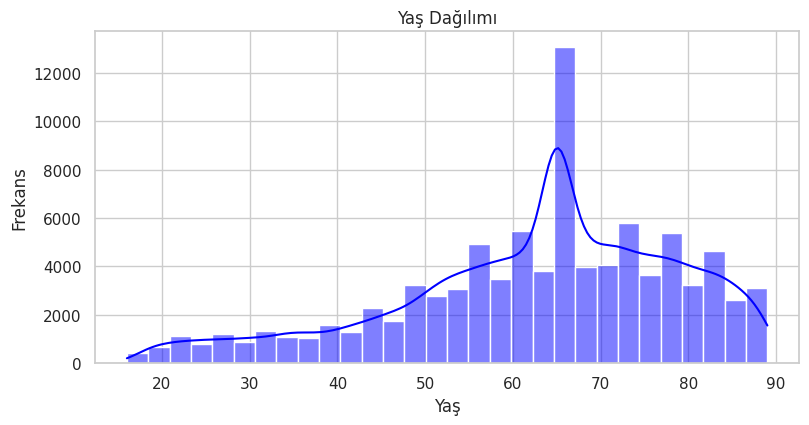

In [303]:
sns.set(style="whitegrid")

# Grafik boyutu

plt.figure(figsize=(20, 25))

# Age - Histogram ve Yoğunluk Grafiği

plt.subplot(5, 2, 1)
sns.histplot(df['age'], kde=True, color='blue', bins=30)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")

Veri setindeki hastaların yaş dağılımı incelendiğinde, hastaların önemli bir bölümünün 60-70 yaş aralığında yoğunlaştığı görülmektedir.

Text(0.5, 0, 'BMI')

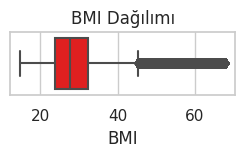

In [304]:
# BMI - Boxplot

plt.subplot(5, 2, 2)
sns.boxplot(x=df['bmi'], color='red')
plt.title("BMI Dağılımı")
plt.xlabel("BMI")

Veri kümesindeki BMI değerlerinin çoğunluğunun ortanca etrafında yoğunlaştığı gözlemlenmiştir, bu da bireylerin BMI değerlerinin büyük ölçüde belirli bir aralıkta toplandığını göstermektedir. Bununla birlikte, bazı bireylerin BMI değerleri, aykırı değerler olarak nitelendirilebilecek kadar düşük veya yüksek seviyelerde bulunmakta, bu da nüfusun küçük bir kısmının ortalamanın dışında BMI değerlerine sahip olduğunu ortaya koymaktadır.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Kişi Sayısı')

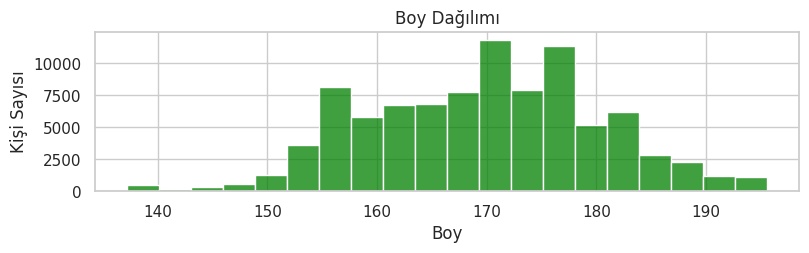

In [305]:
# 3. Height - Histogram


plt.figure(figsize=(20, 12))
plt.subplot(5, 2, 3)
sns.histplot(df['height'], kde=False, color='green', bins=20)
plt.title("Boy Dağılımı")
plt.xlabel("Boy")
plt.ylabel("Kişi Sayısı")

Görüldüğü üzere, boy dağılımı genel olarak 160-180 cm aralığında yoğunlaşmış durumdadır.

Text(0.5, 0, 'Ağırlık (kg)')

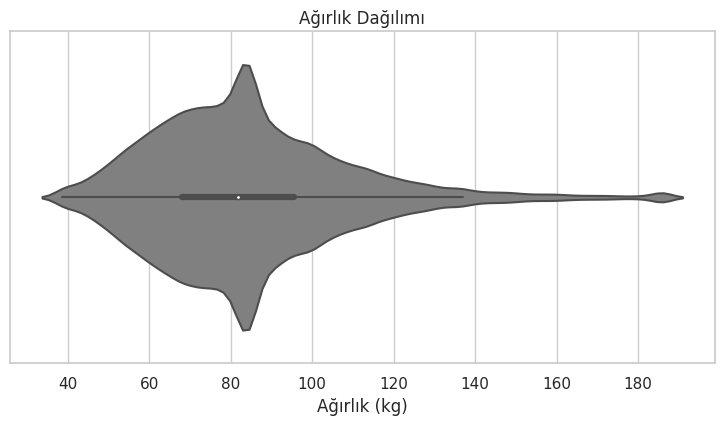

In [306]:
plt.figure(figsize=(20, 25))

# Weight - Violin Plot
plt.subplot(5, 2, 1)
sns.violinplot(x=df['weight'], color='gray')
plt.title("Ağırlık Dağılımı")
plt.xlabel("Ağırlık (kg)")


Ağırlık dağılımı incelendiğinde, hastaların ağırlıklarının genellikle 60-100 kg aralığında yoğunlaştığı gözlemlenmektedir.

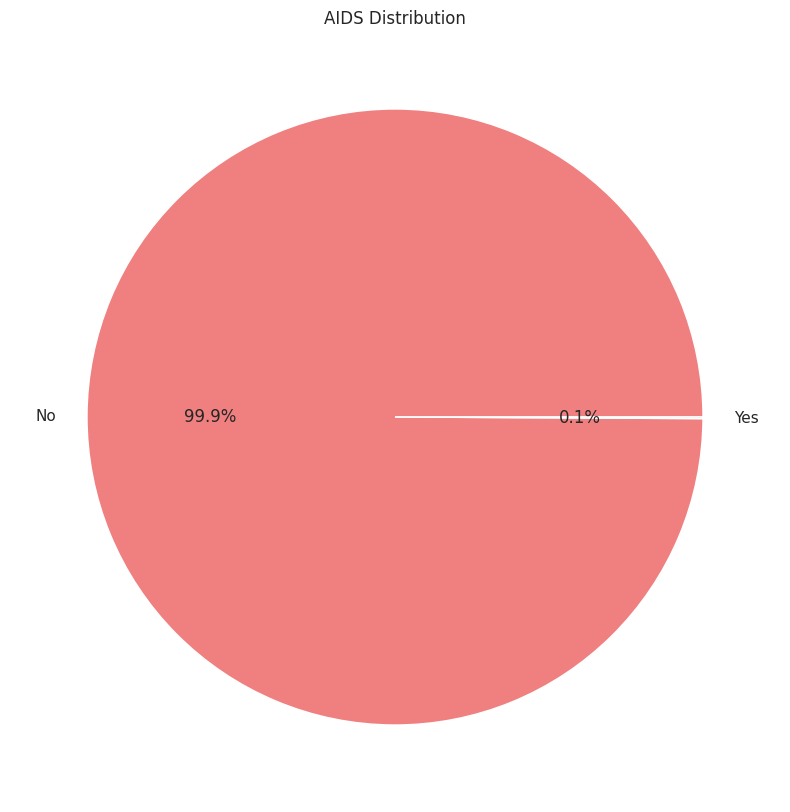

In [307]:
#  AIDS - Bar Plot

plt.figure(figsize=(10, 10))
aids_counts = df['aids'].value_counts()
plt.pie(aids_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title("AIDS Distribution")
plt.show()

Veri kümesindeki AIDS durumu incelendiğinde, "No" (0) değerinin %99.9 oranında olduğu görülmektedir. Bu, çoğu bireyin AIDS durumu açısından negatif olduğunu ve sadece çok küçük bir kısmının pozitif olduğunu gösterir. 

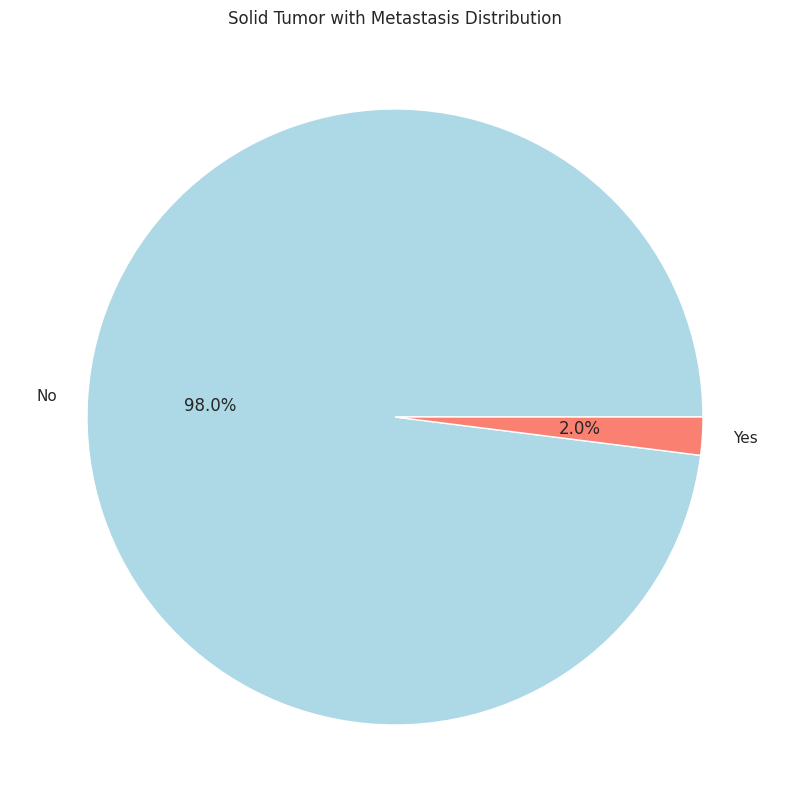

In [308]:
plt.figure(figsize=(10, 10))
tumor_counts = df['solid_tumor_with_metastasis'].value_counts()
plt.pie(tumor_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Solid Tumor with Metastasis Distribution")
plt.show()

Veri kümesindeki Solid Tumor with Metastasis durumu incelendiğinde, hastaların %98'inin solid tümör ve metastaz taşımadığı (0 = Hayır), yalnızca %2'sinin ise bu durumu taşıdığı (1 = Evet) tespit edilmiştir. Bu, verinin büyük bir kısmının solid tümör ve metastazdan muaf olan bireylerden oluştuğunu, ancak küçük bir oranın, yani %2'nin, solid tümör ve metastaz gibi ciddi bir durumu taşıdığını göstermektedir. Bu sonuç, solid tümör ve metastazın, örneklemde nadir görülen bir durum olduğunu ve çoğu hastanın bu tür bir sağlık sorunuyla karşılaşmadığını ortaya koymaktadır.

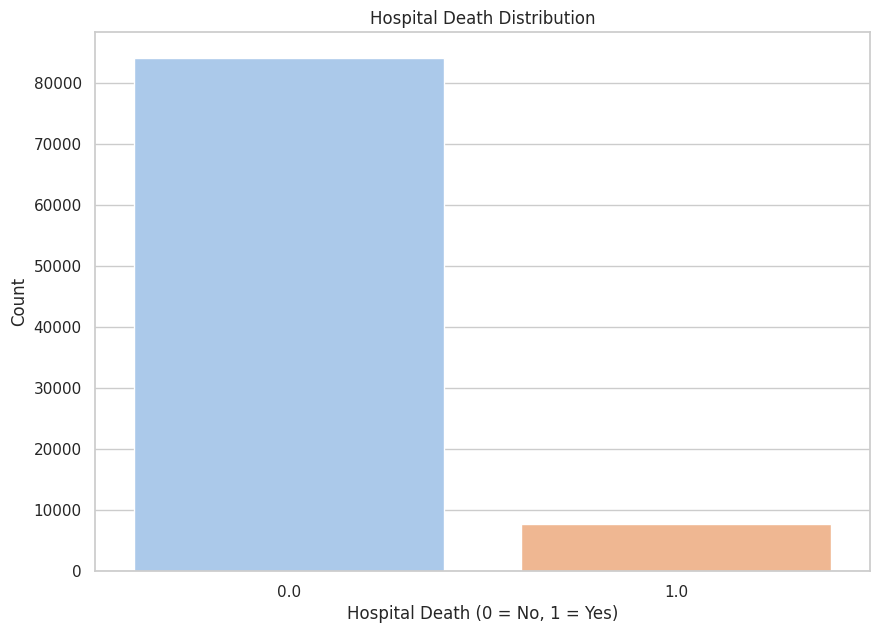

In [309]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df['hospital_death'], palette='pastel')
plt.title("Hospital Death Distribution")
plt.xlabel("Hospital Death (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_30/2106320609.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['heart_rate_apache'], shade=True, color='green')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Heart Rate (bpm)')

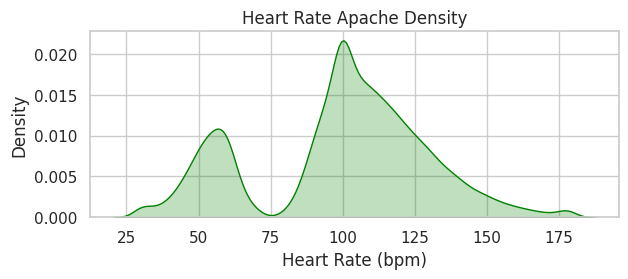

In [310]:
# Heart Rate Apache - KDE Plot

plt.figure(figsize=(15, 14))
plt.subplot(5, 2, 5)
sns.kdeplot(df['heart_rate_apache'], shade=True, color='green')
plt.title("Heart Rate Apache Density")
plt.xlabel("Heart Rate (bpm)")

# Değişkenler İçin Gruplama İşlmeleri

Şimdi farklı gruplama işlemleri yaparak hastane içi ölüme etki eden faktörleri bulmaya çalışacağız

In [311]:
# Etnik köken ve hastane içi ölüm durumunu grupla
df_ethnicity_icu = df.groupby(by="ethnicity")["hospital_death"].value_counts().unstack(fill_value=0)

# Her etnik grup için ölüm oranını hesapla
df_ethnicity_icu['death_percentage'] = df_ethnicity_icu[1] / (df_ethnicity_icu[0] + df_ethnicity_icu[1]) * 100

# Sonuçları göster
df_ethnicity_icu

/tmp/ipykernel_30/3969995805.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ethnicity_icu = df.groupby(by="ethnicity")["hospital_death"].value_counts().unstack(fill_value=0)


hospital_death,0.0,1.0,death_percentage
ethnicity,,,
African American,8567,700,7.553685
Asian,1012,89,8.083560
Caucasian,66515,6127,8.434514
Hispanic,3323,359,9.750136
Native American,706,65,8.430610
Other/Unknown,3915,335,7.882353


Verilere göre, farklı etnik kökenler arasında hastaneye yatış sonrası ölüm oranları incelendiğinde, Hispanik etnik kökeninin diğerlerine kıyasla en yüksek ölüm oranına sahip olduğu açıkça görülmektedir. Hispanik grubunun ölüm oranı %9.75 olarak hesaplanmıştır, bu da diğer etnik kökenlere göre belirgin bir artışı işaret etmektedir.

In [312]:
# Yaş ve hastane içi ölüm durumunu grupla
df_age_icu = df.groupby(by="age")["hospital_death"].value_counts().unstack(fill_value=0)

# Her yaş için ölüm oranını hesapla
df_age_icu['death_percentage'] = df_age_icu[1] / (df_age_icu[0] + df_age_icu[1]) * 100

df_age_icu

hospital_death,0.0,1.0,death_percentage
age,,,
16.0,41,2,4.651163
17.0,118,4,3.278689
18.0,245,6,2.390438
19.0,327,8,2.388060
20.0,322,5,1.529052
21.0,350,11,3.047091
22.0,362,16,4.232804
23.0,376,10,2.590674
24.0,377,12,3.084833


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


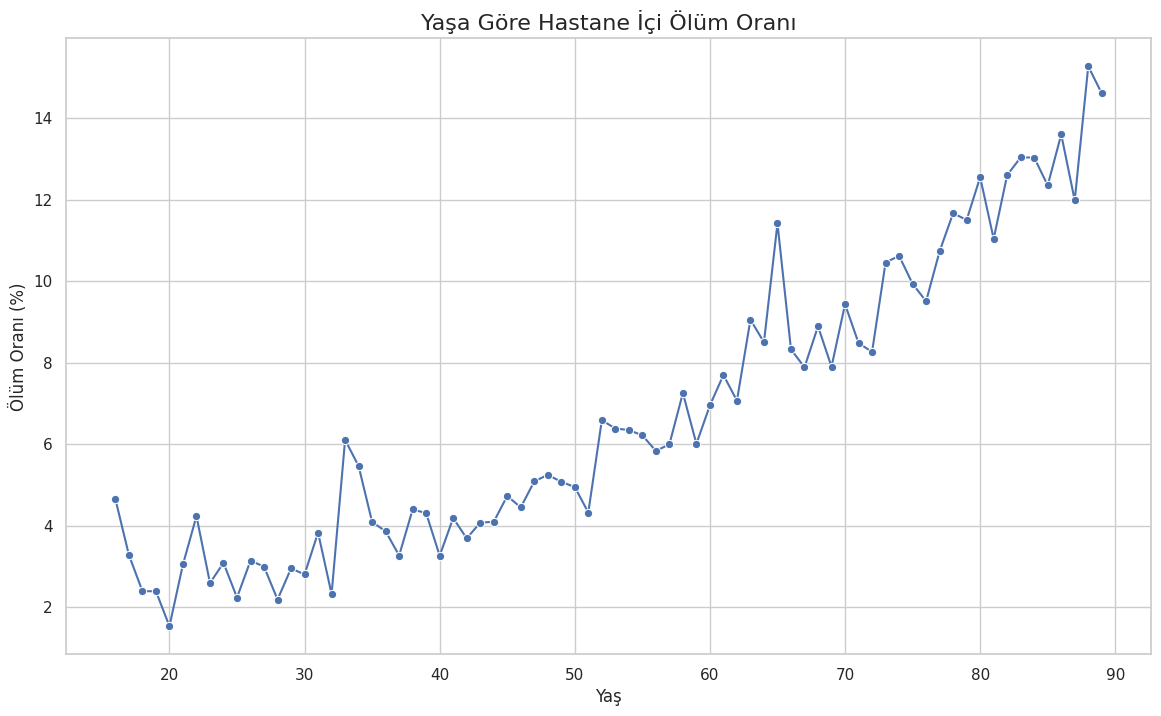

In [313]:
plt.figure(figsize=(14, 8))

# Yaş grubu ile ölüm oranını çizgi grafiği olarak görselleştirelim
sns.lineplot(x=df_age_icu.index, y=df_age_icu['death_percentage'], marker='o', color='b')

plt.title('Yaşa Göre Hastane İçi Ölüm Oranı', fontsize=16)
plt.xlabel('Yaş', fontsize=12)
plt.ylabel('Ölüm Oranı (%)', fontsize=12)

plt.grid(True)
plt.show()

Yaş değişkeni, hastane içi ölüm oranları üzerinde önemli bir etkiye sahiptir ve bu etki özellikle 60 yaş ve sonrasında daha belirgin hale gelir. Yaş arttıkça ölüm oranları artmaktadır. Bu, yaşlı hastaların daha yüksek risk taşıdığına ve tedavi süreçlerinde daha dikkatli olunması gerektiğine işaret etmektedir.

In [314]:
# cinsiyet ve hastane içi ölüm durumunu grupla
df_gender_icu = df.groupby(by="gender")["hospital_death"].value_counts().unstack(fill_value=0)

# Her etnik grup için ölüm oranını hesapla
df_gender_icu['death_percentage'] = df_gender_icu[1] / (df_gender_icu[0] + df_gender_icu[1]) * 100

df_gender_icu

/tmp/ipykernel_30/1489954776.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gender_icu = df.groupby(by="gender")["hospital_death"].value_counts().unstack(fill_value=0)


hospital_death,0.0,1.0,death_percentage
gender,,,
F,38645,3593,8.506558
M,45393,4082,8.250632


Cinsiyet Değişkeninin Hatane içi ölüm üzerinde kayda değer bir etkisinin olmadğı görülmektedir.

In [315]:
# hepatic_failure(karaciğer yetmezliği) için hastane içi ölüm analzi

df_hf_icu = df.groupby(by="hepatic_failure")["hospital_death"].value_counts().unstack(fill_value=0)

# Her etnik grup için ölüm oranını hesapla
df_hf_icu['death_percentage'] = df_hf_icu[1] / (df_hf_icu[0] + df_hf_icu[1]) * 100


df_hf_icu

hospital_death,0.0,1.0,death_percentage
hepatic_failure,,,
0.0,83086,7476,8.255118
1.0,952,199,17.289314


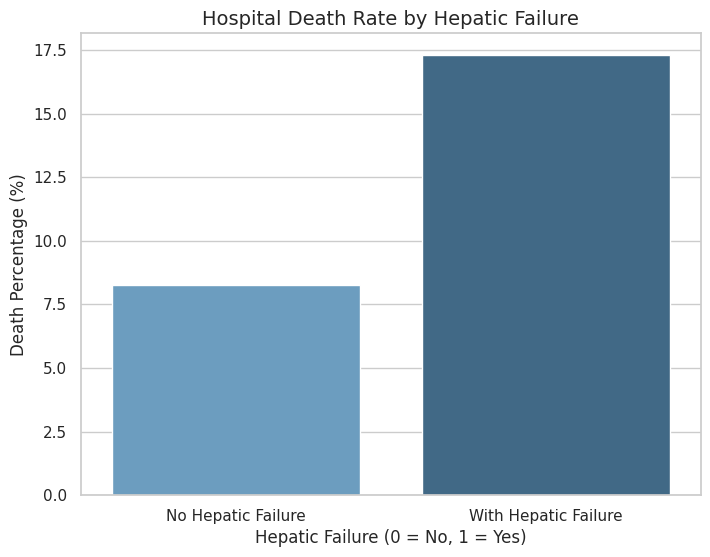

In [316]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_hf_icu.index, y=df_hf_icu['death_percentage'], palette='Blues_d')

plt.title("Hospital Death Rate by Hepatic Failure", fontsize=14)
plt.xlabel("Hepatic Failure (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Death Percentage (%)", fontsize=12)
plt.xticks([0, 1], ['No Hepatic Failure', 'With Hepatic Failure'])

plt.show()

Görüleceği üzere karaciğer yetmezliği yaşayan hastaların hastane içi ölüm oranı karaciğer yetmezliği yaşamayan hastaların 2 katından daha fazladır
Bu da karaciğer yetmezliğinin hastane içi ölümde önemli bir etkiye sahip olduğunu ve bu hastalığa sahip hastların tedavisinin istenilen düzeyde olmadığını gösterir.

In [317]:
# Cirrhosis (Siroz) ve Hastane İçi Ölüm Durumu

df_cirrhosis_icu = df.groupby(by="cirrhosis")["hospital_death"].value_counts().unstack(fill_value=0)

df_cirrhosis_icu['death_percentage'] = df_cirrhosis_icu[1] / (df_cirrhosis_icu[0] + df_cirrhosis_icu[1]) * 100

df_cirrhosis_icu

hospital_death,0.0,1.0,death_percentage
cirrhosis,,,
0.0,82891,7436,8.232311
1.0,1147,239,17.243867


In [318]:
# Cirrhosis ve Hepatic Failure durumunu 

df_cirrhosis_hepatic = df.groupby(by=["cirrhosis", "hepatic_failure"])["hospital_death"].value_counts().unstack(fill_value=0)

df_cirrhosis_hepatic

hospital_death               0.0   1.0
cirrhosis hepatic_failure             
0.0       0.0              82465  7373
          1.0                426    63
1.0       0.0                621   103
          1.0                526   136

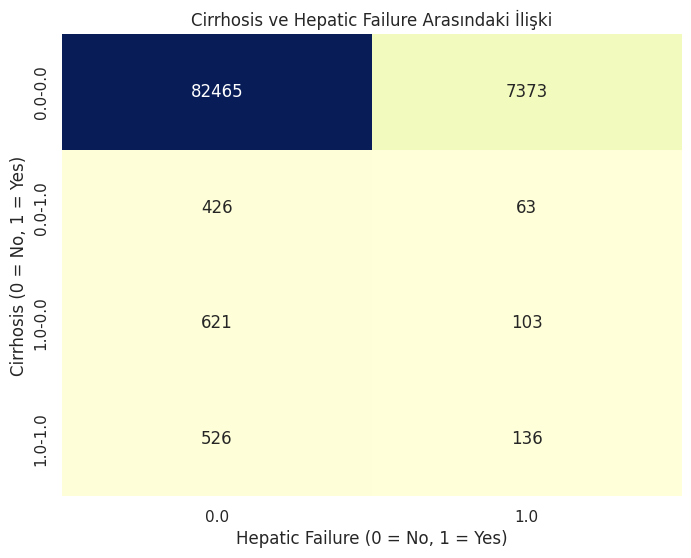

In [319]:
# Isı haritası ile görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(df_cirrhosis_hepatic, annot=True, cmap="YlGnBu", fmt="d", cbar=False)
plt.title("Cirrhosis ve Hepatic Failure Arasındaki İlişki")
plt.xlabel("Hepatic Failure (0 = No, 1 = Yes)")
plt.ylabel("Cirrhosis (0 = No, 1 = Yes)")
plt.show()

In [320]:
# heart_rate_apache (kalp atış hızını) inceleyelim

df_hr_icu = df.groupby(by="heart_rate_apache")["hospital_death"].value_counts().unstack(fill_value=0)

df_hr_icu['death_percentage'] = df_hr_icu[1] / (df_hr_icu[0] + df_hr_icu[1]) * 100

df_hr_icu

hospital_death,0.0,1.0,death_percentage
heart_rate_apache,,,
30.000000,356,197,35.623870
31.000000,56,15,21.126761
32.000000,85,19,18.269231
33.000000,68,10,12.820513
34.000000,93,18,16.216216
35.000000,90,12,11.764706
36.000000,101,21,17.213115
37.000000,113,13,10.317460
38.000000,148,19,11.377246


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


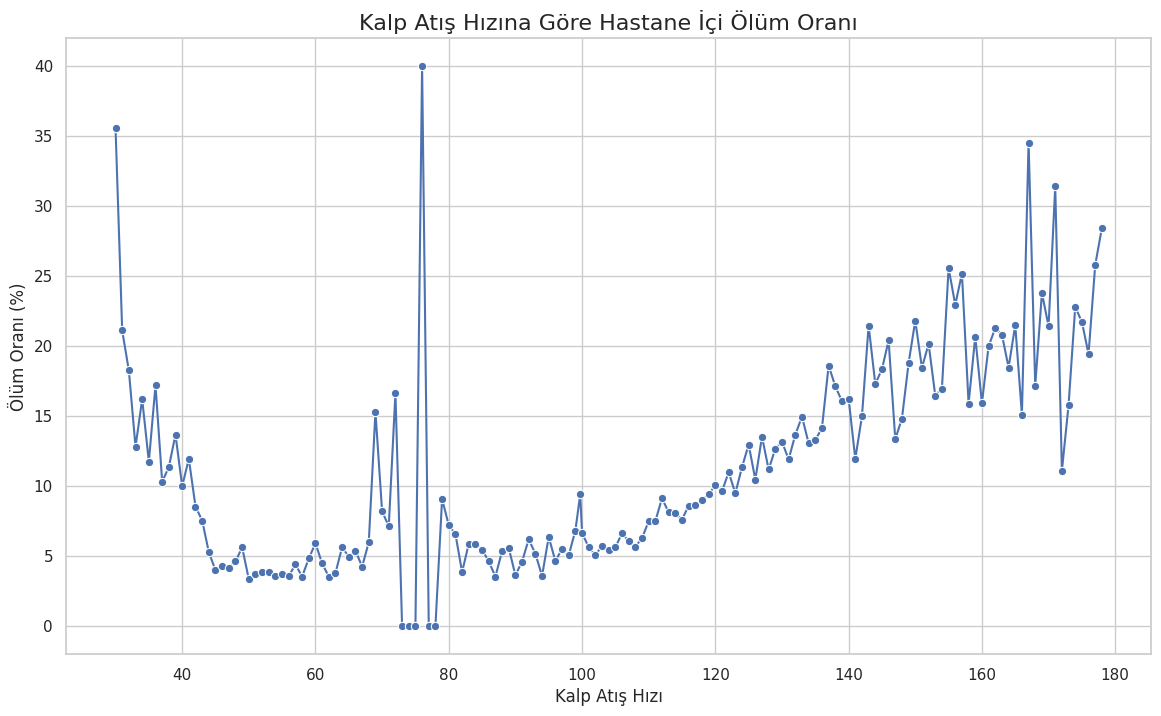

In [321]:
plt.figure(figsize=(14, 8))

sns.lineplot(x=df_hr_icu.index, y=df_hr_icu['death_percentage'], marker='o', color='b')

plt.title('Kalp Atış Hızına Göre Hastane İçi Ölüm Oranı', fontsize=16)
plt.xlabel('Kalp Atış Hızı', fontsize=12)
plt.ylabel('Ölüm Oranı (%)', fontsize=12)

plt.grid(True)
plt.show()

Kalp atış hızının çok düşük ve çok yüksek olduğu durumlarda hastane içi ölüm oranında çok ciddi bir oranda artış görülmektedir bu da kalp atış hızının normalin dışındaki seviyelerde ölümcül olabileceğini göstermektedir

In [322]:
# diabetes_mellitus ( şeker hastalığı)

# diabetes_mellitus (şeker hastalığı) için hastane içi ölüm analizi
df_dm_icu = df.groupby(by="diabetes_mellitus")["hospital_death"].value_counts().unstack(fill_value=0)

# Her şeker hastalığı durumu için ölüm oranını hesapla
df_dm_icu['death_percentage'] = df_dm_icu[1] / (df_dm_icu[0] + df_dm_icu[1]) * 100

df_dm_icu

hospital_death,0.0,1.0,death_percentage
diabetes_mellitus,,,
0.0,65639,6175,8.598602
1.0,18399,1500,7.538067


Şeker hastalığı olan hastaların hastanede ölüm oranı (%7.54) şeker hastalığı olmayanlara kıyasla (%8.60) biraz daha düşük. Bu, şeker hastalığının ölüm oranı üzerinde belirgin bir etkisi olmadığını veya şeker hastalığının diğer faktörlerle (örneğin tedavi, yaş) ilişkilendirilmiş olabileceğini gösteriyor.

# Feature Selection (Özellik Seçimi)

Feature Selection, bir veri setindeki gereksiz veya düşük bilgi taşıyan değişkenlerin belirlenip çıkarılması sürecidir. Bu süreç, makine öğrenmesi modellerinin performansını artırmak ve daha iyi bir genel doğruluk sağlamak için oldukça önemlidir.

Veri setinde bulunan encounter_id, patient_id ve hospital_id sütunları, hastane içi ölümle ilgili herhangi bir ilişki taşımamaktadır. Bu sütunlar sadece kimlik numaraları olup, hedef değişken üzerinde etkisi olmadığı için bu sütunların veri setinden silinmesi gerekmektedir. Kimlik numaralarının veri analizi açısından anlamlı bir katkı sağlamadığı için, modelin doğruluğunu artırmak amacıyla bu sütunlar kaldırılacaktır.

In [323]:
df.drop('encounter_id', axis=1, inplace=True)
df.drop('patient_id', axis=1, inplace=True)
df.drop('hospital_id', axis=1, inplace=True)

Şimdi ise sayısal değişkenler için korelasyon analizi yaparak hastane içi ölüm değişkeni üzerinde etkisi olmayan değişkenlerin silinme işlemini gereçkeleştirmeliyiz

In [324]:
# Sayısal değişkenlerin seçilmesi
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Hedef değişken
target_variable = 'hospital_death'

# Korelasyon hesaplamak için bir dictionary 
correlation_results = {}

# Hedef değişken ile her bir sayısal değişkenin korelasyonunu hesaplayalım
for column in numeric_columns:
    if column != target_variable:  
        correlation = df[column].corr(df[target_variable]) 
        correlation_results[column] = correlation

correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Feature', 'Correlation with ' + target_variable])

# Korelasyon sonuçlarını mutlak değere göre küçükten büyüğe sıralama
correlation_df['Absolute Correlation'] = correlation_df['Correlation with ' + target_variable].abs()
correlation_df = correlation_df.sort_values(by='Absolute Correlation', ascending=True)

correlation_df

,Feature,Correlation with hospital_death,Absolute Correlation
4,icu_id,0.000242,0.000242
9,apache_post_operative,-0.001521,0.001521
65,aids,0.003340,0.003340
21,d1_diasbp_max,0.003848,0.003848
26,d1_heartrate_min,-0.004089,0.004089
23,d1_diasbp_noninvasive_max,0.004223,0.004223
39,d1_temp_max,0.005121,0.005121
33,d1_spo2_max,-0.007847,0.007847
27,d1_mbp_max,-0.015485,0.015485
29,d1_mbp_noninvasive_max,-0.015682,0.015682


Çok düşük korelasyona sahip sütunları kaldırabiliriz çünkü hedef değişken üzerinde neredeyse hiç bir etkileri yok

In [325]:
list_low_corelation = ["icu_id","apache_post_operative","aids","d1_diasbp_max","d1_heartrate_min","d1_diasbp_noninvasive_max","d1_temp_max","d1_spo2_max"]

for i in list_low_corelation:
    df.drop(i, axis=1, inplace=True)
    

Kalan sayısal değişkneler için random forest ile analiz yapacağız

                          Feature  Importance
57       apache_4a_icu_death_prob    0.075702
56  apache_4a_hospital_death_prob    0.072312
28                    d1_spo2_min    0.027771
30                   d1_sysbp_min    0.024492
33                    d1_temp_min    0.022628
7             apache_3j_diagnosis    0.022429
4                pre_icu_los_days    0.021417
32       d1_sysbp_noninvasive_min    0.020998
17                    temp_apache    0.020694
53                 d1_glucose_min    0.020525
25         d1_mbp_noninvasive_min    0.019834
1                             bmi    0.019100
21               d1_heartrate_max    0.018770
52                 d1_glucose_max    0.018059
13              heart_rate_apache    0.018042
5                          weight    0.017996
23                     d1_mbp_min    0.017950
0                             age    0.017912
27                d1_resprate_min    0.017642
15                     map_apache    0.017389
55               d1_potassium_min 

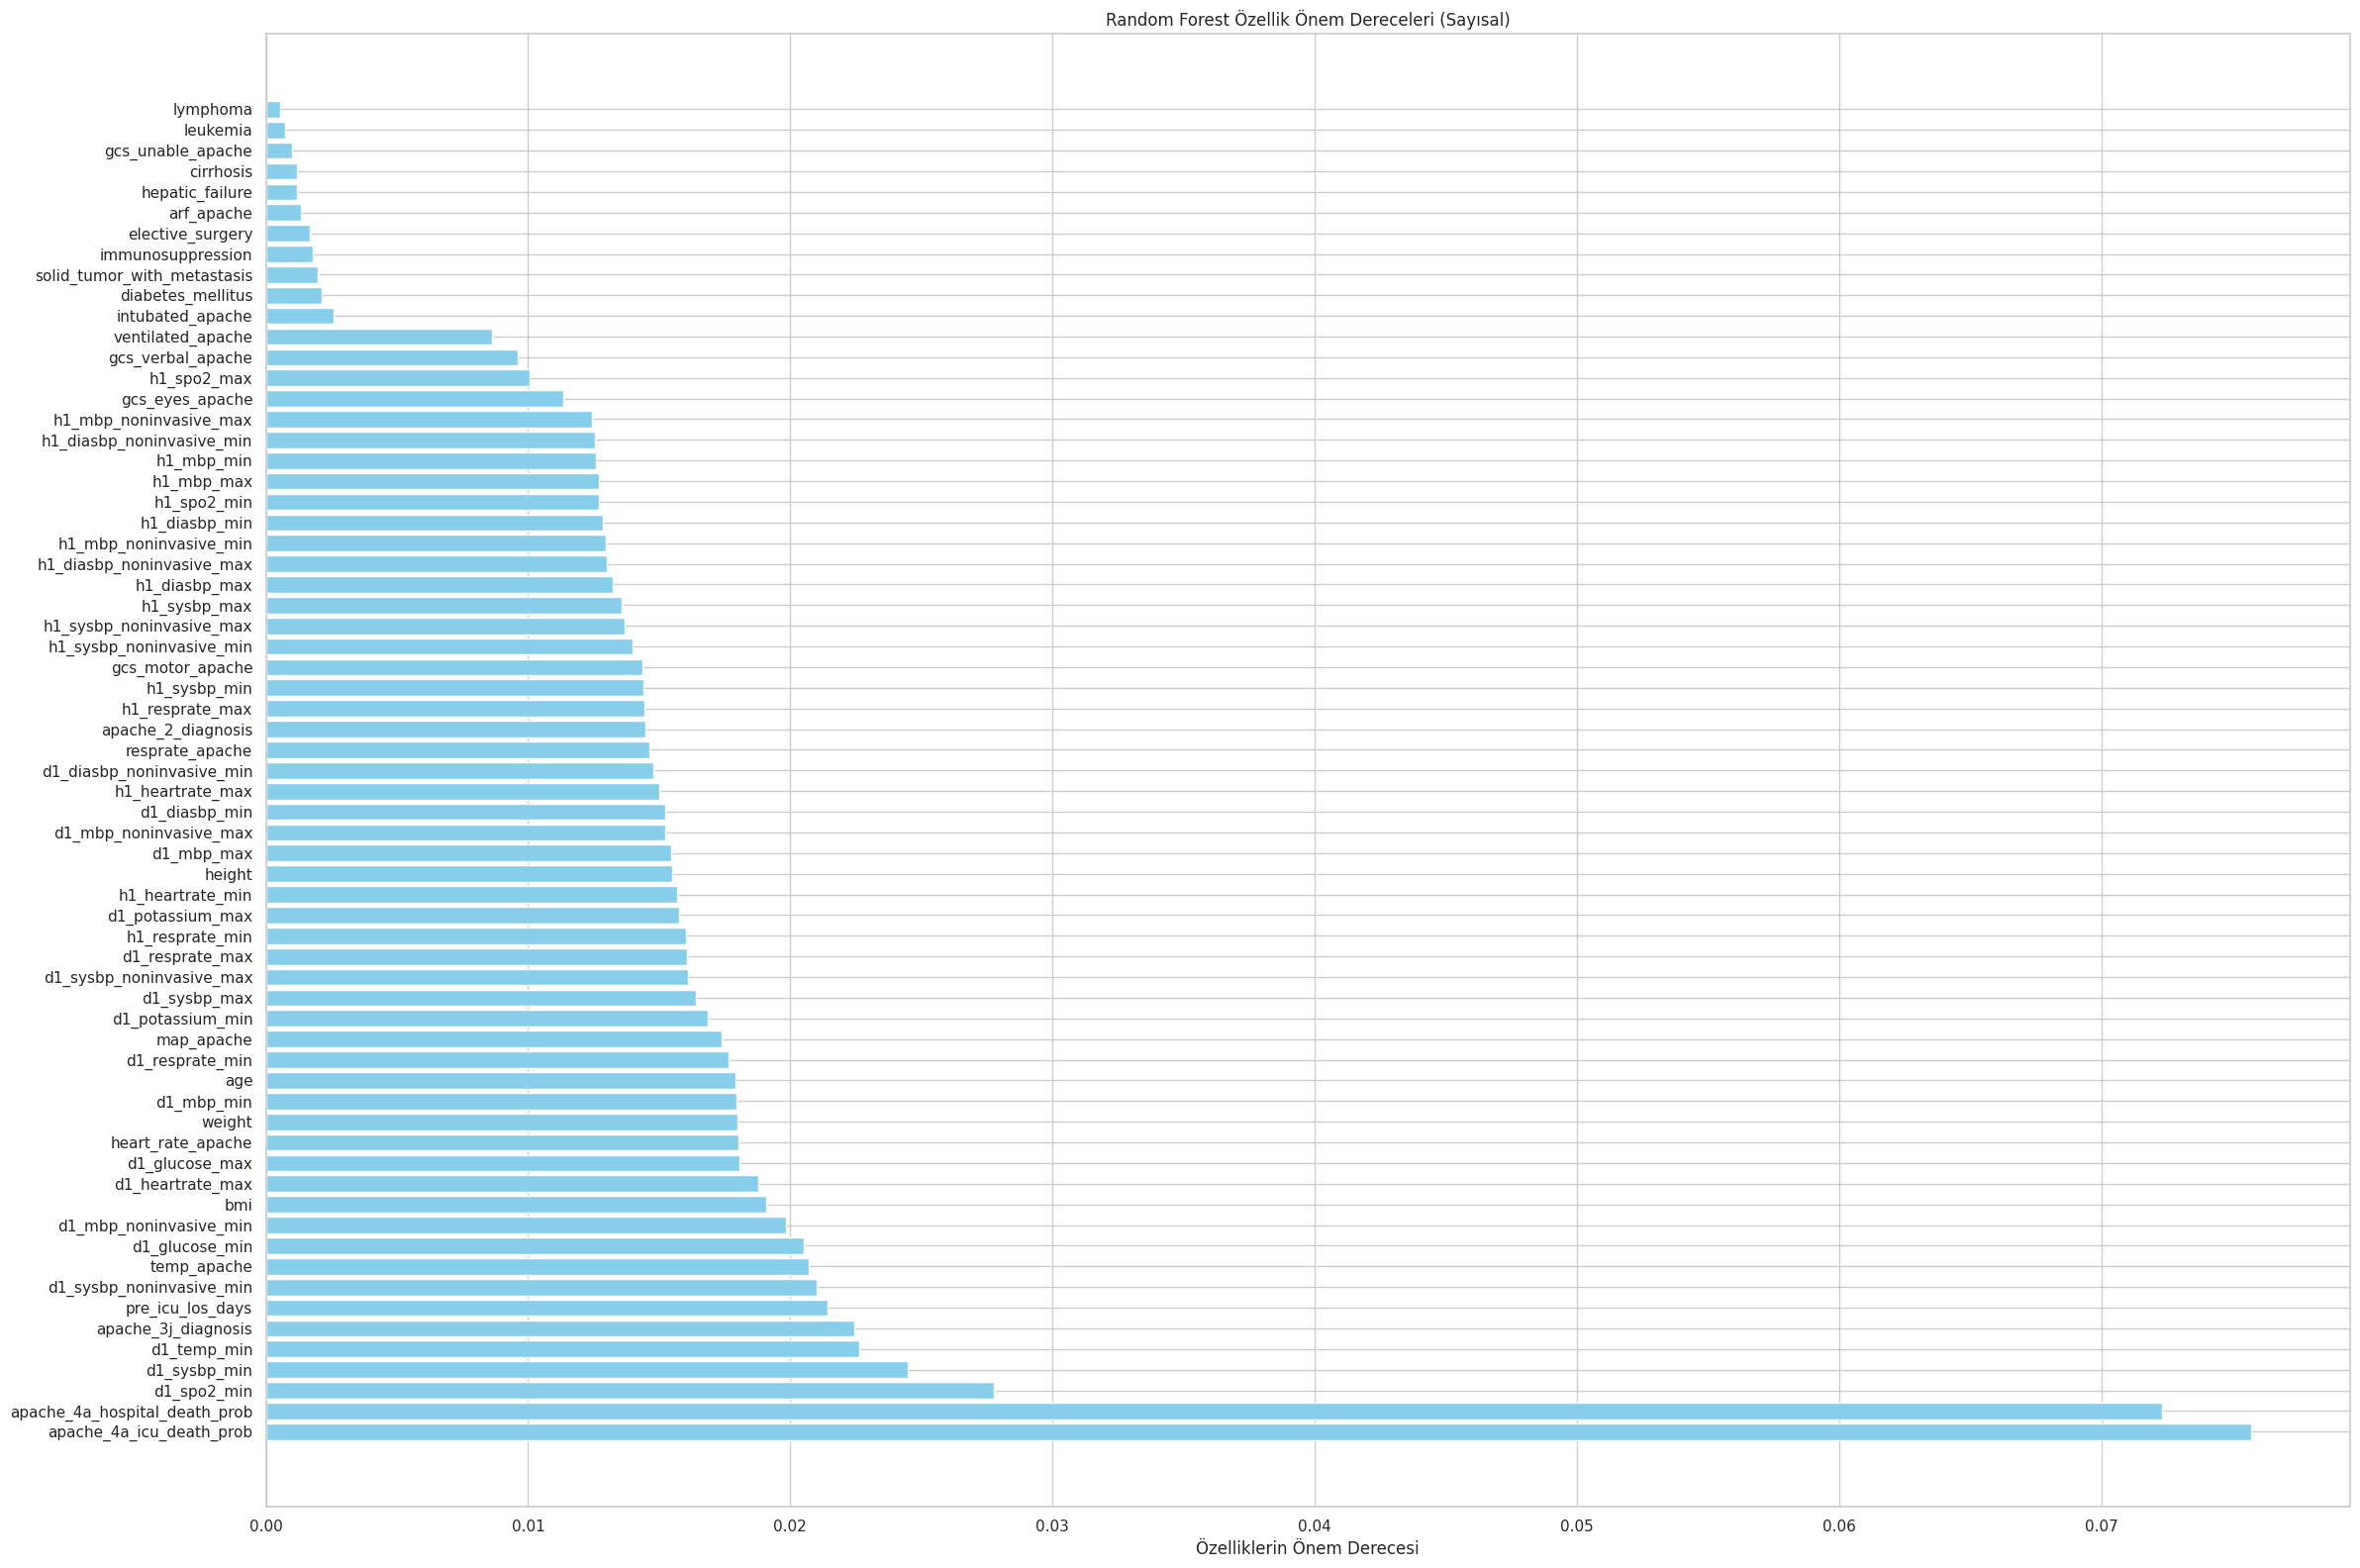

In [326]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Sayısal sütunları seçme
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Hedef değişken (hospital_death) ve sayısal sütunlar
X = df[numerical_cols].drop(columns=['hospital_death'])  # 'hospital_death' dışında kalan sayısal sütunlar
y = df['hospital_death']  # hedef değişken

# Random Forest modelini oluşturun
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitin
rf_model.fit(X, y)

# Özelliklerin önem derecelerini alalım
importances = rf_model.feature_importances_

# Özelliklerin isimlerini sıralayalım
features = X.columns

# Özelliklerin önem derecelerini içeren bir DataFrame oluşturun
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Özellikleri önem sırasına göre sıralayalım
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Özelliklerin önem derecelerini yazdıralım
print(feature_importance_df)

# Özelliklerin önem derecelerini görselleştirelim
plt.figure(figsize=(24, 16))  # Grafik boyutunu artırdık
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Özelliklerin Önem Derecesi')
plt.title('Random Forest Özellik Önem Dereceleri (Sayısal)')
plt.tight_layout()  # Grafik dışa taşmasın diye düzenleme
plt.show()


Şimdi hedef değişken ile arasındaki ilişkinin çok düşük olduğu sütunları çıkaracağız

In [327]:
columns_to_drop = [
    'intubated_apache', 'diabetes_mellitus', 'solid_tumor_with_metastasis', 
    'immunosuppression', 'elective_surgery', 'arf_apache', 'hepatic_failure', 
    'cirrhosis', 'gcs_unable_apache', 'leukemia', 'lymphoma'
]


df.drop(columns=columns_to_drop, inplace=True)

# Kategorik değişkenler için özellik seçimi

Kategorik değişkenler için hedef değişken ile olan ilişkisini ve önemini gözlemlemek için ki-kare testi kullanacağız
Ki-kare testi, gözlenen ve beklenen frekanslar arasındaki farkı ölçerek değişkenin hedef değişkenle ilişkisini değerlendirir.

In [328]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları seçiyoruz
categorical_columns = df.select_dtypes(include=['category']).columns

# Kategorik sütunları sayısal değerlere dönüştürüyoruz
df_encoded = df.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Ki-Kare testi
chi2_scores, p_values = chi2(df_encoded[categorical_columns], df['hospital_death'])

# Sonuçları bir DataFrame olarak düzenliyoruz
chi2_results = pd.DataFrame({
    'Feature': categorical_columns,
    'Chi-Square Score': chi2_scores,
    'p-value': p_values
}).sort_values(by='Chi-Square Score', ascending=False)

chi2_results

,Feature,Chi-Square Score,p-value
5,apache_3j_bodysystem,776.158210,8.237461e-171
6,apache_2_bodysystem,612.284664,3.563129e-135
3,icu_stay_type,46.888473,7.514338e-12
2,icu_admit_source,40.384517,2.085876e-10
4,icu_type,13.723621,2.117741e-04
0,ethnicity,1.487740,2.225675e-01
1,gender,0.896332,3.437672e-01


gender ve ethnicity görüldüğü üzere anlamlı bir etkiye sahip değiller bu sebeple veriden çıkarılabilir

In [329]:
df.drop(columns=['gender', 'ethnicity'], inplace=True)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            91713 non-null  float64 
 1   bmi                            91713 non-null  float64 
 2   height                         91713 non-null  float64 
 3   icu_admit_source               91713 non-null  category
 4   icu_stay_type                  91713 non-null  category
 5   icu_type                       91713 non-null  category
 6   pre_icu_los_days               91713 non-null  float64 
 7   weight                         91713 non-null  float64 
 8   apache_2_diagnosis             91713 non-null  float64 
 9   apache_3j_diagnosis            91713 non-null  float64 
 10  gcs_eyes_apache                91713 non-null  float64 
 11  gcs_motor_apache               91713 non-null  float64 
 12  gcs_verbal_apache              9

# Feature engineering (Özellik Mühendsiliği)

Makine öğrenmesi projelerinde bütün verilerin sayısal olması gerekir o yüzden elimizdeki kategorik değişkenleri sayısal verilere dönüştüreceğiz bunu yaparken de One-Hot Encoding metodunu kullanacğız.

One-Hot Encoding tüm bu sütunlar için en uygun yöntemdir, çünkü her bir kategori bağımsızdır ve aralarında sıralama ilişkisi yoktur. Bu, her kategoriyi yeni bir sütuna dönüştürerek modelin her bir kategoriyi bağımsız bir özellik olarak ele almasını sağlar.

In [331]:
# Kategorik değişkenleri One-Hot Encoding ile dönüştürmek
df = pd.get_dummies(df, columns=['icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'])

Özellik normalizasyonu ve standardizasyonu, modelin verimli çalışabilmesi için önemli bir adımdır. Özellikle farklı ölçekteki sayısal özellikler (örneğin, age, bmi, height, weight) için **MinMaxScaler** veya **StandardScaler** gibi araçlar kullanarak verileri standartlaştırmak, modelin daha hızlı ve doğru öğrenmesini sağlayabilir.


In [332]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df[['age', 'bmi', 'height', 'weight']] = scaler.fit_transform(df[['age', 'bmi', 'height', 'weight']])

Yeni Özellikler Türetme
Vital signs gibi özelliklerden (örneğin heart_rate_apache, map_apache, temp_apache) yeni özellikler türetebiliizz. Mean, maksimum veya minimum gibi özelliklerin yanı sıra, bazı değişkenler arasındaki oranlar veya farklar da türetilebilir. Örneğin, **d1_sysbp_max** ve **d1_sysbp_min** arasındaki farkı veya oranı hesaplamak, bu bilgiyi model için daha anlamlı hale getirebilir.


In [333]:
df['sysbp_diff'] = df['d1_sysbp_max'] - df['d1_sysbp_min']
df['sysbp_ratio'] = df['d1_sysbp_max'] / (df['d1_sysbp_min'] + 1e-6)

İnteraksiyon Özellikleri
Bazı değişkenler arasında etkileşimler olabilir. Örneğin, **age** ve **bmi** birlikte sağlık durumu üzerinde etkili olabilir. Bu tür etkileşim özelliklerini de türetmek, modelin performansını artırabilir


In [334]:
df['age_bmi_interaction'] = df['age'] * df['bmi']

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 95 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         91713 non-null  float64
 1   bmi                                         91713 non-null  float64
 2   height                                      91713 non-null  float64
 3   pre_icu_los_days                            91713 non-null  float64
 4   weight                                      91713 non-null  float64
 5   apache_2_diagnosis                          91713 non-null  float64
 6   apache_3j_diagnosis                         91713 non-null  float64
 7   gcs_eyes_apache                             91713 non-null  float64
 8   gcs_motor_apache                            91713 non-null  float64
 9   gcs_verbal_apache                           91713 non-null  float64
 10  heart_rate

### Sonuç 

Bu projede elde ettiğimiz analizler ışığında, sağlık verilerinin analizi, özellikle hastaların ölüm riski, yoğun bakım ihtiyaçları ve genel sağlık durumu hakkında tahminlerde bulunmak için büyük bir potansiyele sahiptir. Bu tür veriler, hastaların sağlık durumunu daha iyi anlamak, tedavi süreçlerini optimize etmek ve hastaneye yatırılan her bireyin ihtiyaç duyduğu bakım seviyesini belirlemek amacıyla kullanılabilir. 

Özellikle **hastane yönetimi ve sağlık hizmetleri sektöründe** bu tür bir model, yoğun bakım ünitesine (ICU) alınacak hastaların belirlenmesi ve uygun tedavi planlarının hızlıca oluşturulması gibi kritik kararlar almayı sağlayabilir. Ayrıca, **erken uyarı sistemleri** kurularak sağlık çalışanlarına potansiyel ölüm riskini yüksek hastalar hakkında bildirimde bulunulabilir. Bu, hastaların durumunu daha iyi izlemeye ve tedaviye erken başlamak için sağlık personelinin kaynaklarını etkin bir şekilde yönlendirmeye olanak tanıyacaktır.

### Öneriler ve Algoritma Seçimi

Bu problem için kullanılabilecek uygun makine öğrenmesi algoritmaları ve modelleri şunlardır:

1. **Lojistik Regresyon (Logistic Regression)**:
   - Bu, ölüm riski gibi binary (0/1) sonuçların tahmin edilmesi gereken durumlar için yaygın kullanılan basit ve etkili bir algoritmadır. Özellikle veri setinde sayısal ve kategorik değişkenlerin bir arada bulunması durumunda lojistik regresyon, modelin yorumlanabilirliğini de sağlayarak uygun bir seçim olabilir.

2. **Random Forest**:
   - Karar ağaçlarına dayalı bir topluluk algoritması olan Random Forest, değişkenler arasında ilişkiler ve etkileşimleri iyi bir şekilde yakalayabilir. Ayrıca, özelliklerin önem sırasını vererek hangi değişkenlerin en etkili olduğunu ortaya koyabilir. Bu model, daha karmaşık ilişkilerin öğrenilmesinde de oldukça başarılıdır.

3. **Gradient Boosting Machines (GBM)**:
   - GBM, güçlü bir tahmin modelidir ve hataları hızlı bir şekilde düzeltme yeteneğine sahiptir. Bu model, genellikle veri setlerinde karmaşıklığın arttığı durumlarda çok başarılı olabilir. Sağlık verileri gibi düzensiz ve gürültülü veri setlerinde çok etkili bir performans sergileyebilir.

4. **Deep Learning (Yapay Sinir Ağları)**:
   - Eğer veri seti çok büyükse ve modelin doğruluğu çok kritikse, derin öğrenme yaklaşımları da değerlendirilebilir. Özellikle **yapay sinir ağları (ANN)**, büyük veri setlerinden özellikleri öğrenme konusunda güçlüdür. Ancak, derin öğrenme modelleri genellikle daha fazla hesaplama gücü gerektirir.

### Modelin Kullanım Alanı

- **Erken Uyarı Sistemleri**: Model, hastanelerde erken uyarı sistemlerinin kurulmasına olanak sağlayarak, potansiyel olarak hayat kurtarıcı bir çözüm sunabilir.
- **Kaynak Yönetimi**: Yoğun bakım ünitesine alacak hastaların belirlenmesi, kaynakların doğru şekilde dağıtılmasını sağlar.
- **Kişiselleştirilmiş Tedavi**: Hastaların risk profillerine göre daha özelleştirilmiş tedavi yöntemleri ve bakım planları oluşturulabilir.

Sonuç olarak, sağlık verileri üzerinde yapılan bu tür bir analiz, hastaların sağlık durumunu daha doğru bir şekilde izleyebilmek ve müdahale süreçlerini optimize edebilmek adına oldukça değerli olabilir. **Modelin başarısını artırmak için sürekli olarak güncel verilerle yeniden eğitilmesi ve gerçek dünya koşullarında test edilmesi** gerektiğini unutmamak önemlidir.